#**Predicting the Quality of Transmission of Unestablished Optical Network Channels Using Deep Learning Models**

#**4. METHODS**

**Obtain the Simulation Sofware**

In [ ]:
! git clone https://github.com/Telecominfraproject/oopt-gnpy # clone the repo
! cd oopt-gnpy
#! pip install --editable . # note the trailing dot

Cloning into 'oopt-gnpy'...
remote: Enumerating objects: 8122, done.
remote: Total 8122 (delta 0), reused 0 (delta 0), pack-reused 8122
Receiving objects: 100% (8122/8122), 5.17 MiB | 8.02 MiB/s, done.
Resolving deltas: 100% (5542/5542), done.


**Import Dependencies/Libraries**

In [ ]:
import sys, os
import pandas as pd
import numpy as np
from IPython.display import display
import datetime
import time
import IPython
import IPython.display
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.dates as mpl_dates
import numpy as np
import pandas as pd
import seaborn as sns
import tensorflow as tf
from tensorflow import keras
from scipy.stats import reciprocal
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from pydrive.auth import GoogleAuth
from google.colab import drive
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials
import scipy as sp
import scipy.fftpack
%matplotlib inline
import itertools
import logging
from multiprocessing import Pool
from typing import Dict, List, Optional, Sequence, Tuple, Union
from matplotlib.dates import DateFormatter
import matplotlib.dates as mdates
from statsmodels.graphics.tsaplots import plot_acf
from sklearn.preprocessing import Normalizer
from tensorflow.keras import layers
from IPython.display import Image
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from keras.layers import Conv2D, Conv1D, MaxPooling2D, MaxPooling1D, Flatten, BatchNormalization, Dense, LSTM, Dropout, Bidirectional
from keras.models import Sequential

### Import our modules
!pip install utils==1.0.1
!pip install python-utils
!pip install dataset-utils
!pip install tsaug
import python_utils
import utils
from tsaug.visualization import plot

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 210.4/210.4 KB 7.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.7/78.7 KB 8.4 MB/s eta 0:00:00
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


**Mount the Google Drive**

In [ ]:
# Change Directory
from google.colab import drive
drive.mount('/content/gdrive/')

Mounted at /content/gdrive/


**Upload the Simulation Training Data from the Gaussian Model Software for the Optical Communication network between Sheffield to London and Sheffield to Endinburgh.**

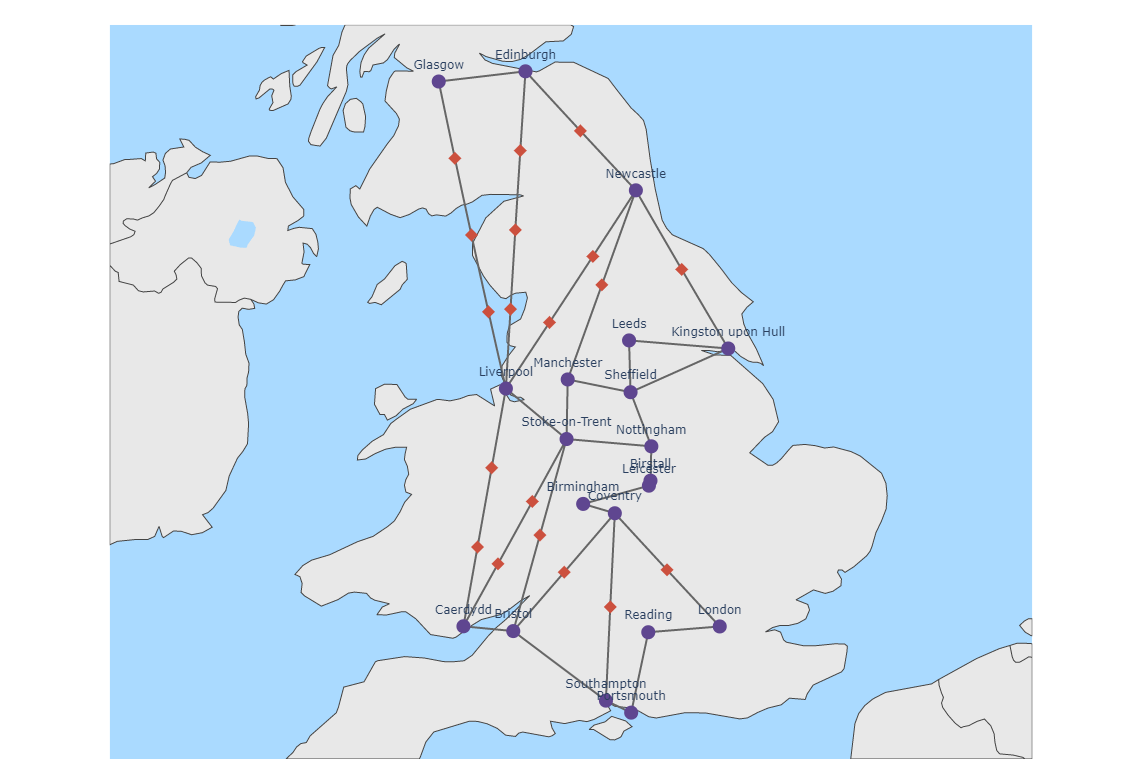

In [ ]:
# Training Set - Optical Network from Sheffield to London and Ffom Sheffield to Endingurgh
df_train = pd.read_csv('/content/gdrive/MyDrive/Sheffield_London__Sheffield_Endinburgh_35_TRAIN.csv')

# Testing Set - Optical Network from Belfast to Glasgow
df_test = pd.read_csv('/content/gdrive/MyDrive/Belfast_Glasgow_35_TEST.csv')

# Upload the Network Diagrams
Network_Sheffield_London = '/content/gdrive/MyDrive/newplot (1).png'
Image(filename = Network_Sheffield_London, width=500, height=300)

**Upload the Network Diagrams 2**

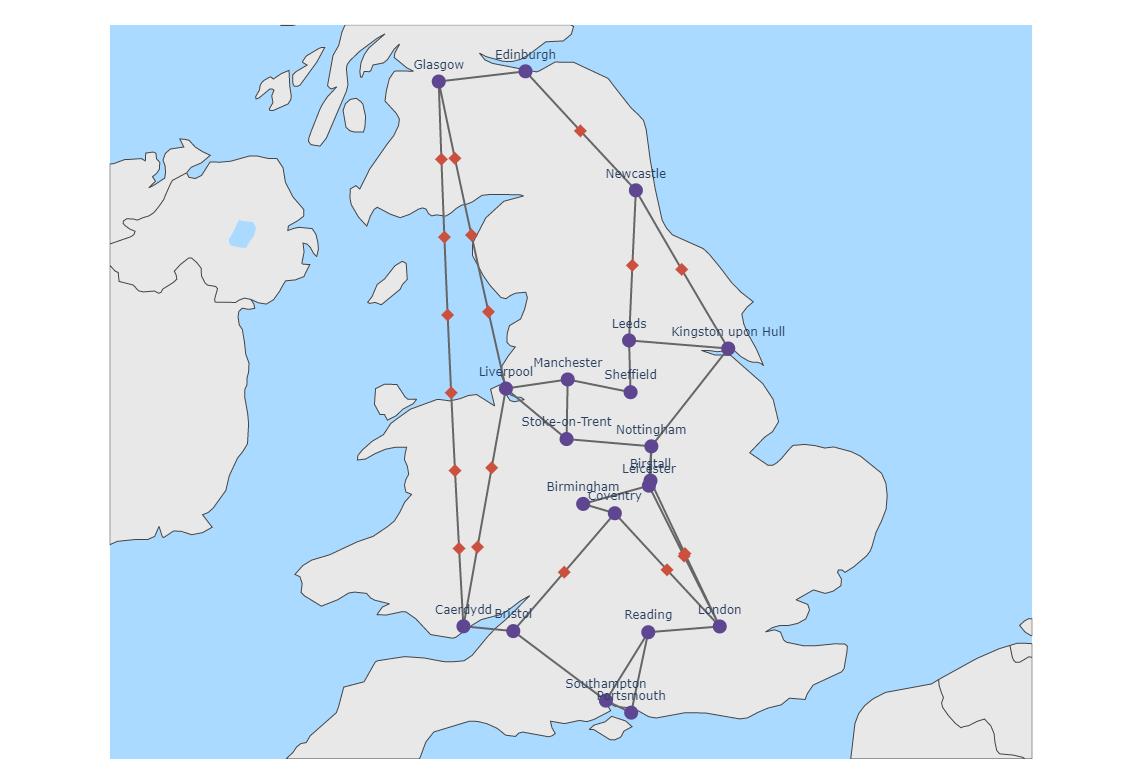

In [ ]:
Network_Sheffield_Endinburgh = '/content/gdrive/MyDrive/newplot (2).png'
Image(filename = Network_Sheffield_Endinburgh, width=500, height=300)

**View the Training Dataset**

In [ ]:
df_train

Channel frequency (THz)  Channel power (dBm)  OSNR ASE (signal bw, dB)  \
0                      192.15               -20.05                     21.45   
1                      192.20               -20.05                     21.45   
2                      192.25               -20.05                     21.45   
3                      192.30               -20.05                     21.44   
4                      192.35               -20.05                     21.44   
...                       ...                  ...                       ...   
3195                   195.90               -20.23                     16.18   
3196                   195.95               -20.22                     16.18   
3197                   196.00               -20.22                     16.18   
3198                   196.05               -20.21                     16.18   
3199                   196.10               -20.20                     16.18   

      SNR NLI (signal bw, dB)  Span  Distance (km)  SNR total (signal bw, dB)  
0                       22.68     4            276                      19.01  
1                       22.13     4            276                      18.77  
2                       21.89     4            276                      18.65  
3                       21.73     4            276                      18.58  
4                       21.63     4            276                      18.52  
...                       ...   ...            ...                        ...  
3195                    15.06    18           1239                      12.57  
3196                    15.16    18           1239                      12.63  
3197                    15.32    18           1239                      12.71  
3198                    15.56    18           1239                      12.85  
3199                    16.11    18           1239                      13.13  

[3200 rows x 7 columns]

**View the Testing Dataset**

In [ ]:
df_test

Channel frequency (THz)  Channel power (dBm)  OSNR ASE (signal bw, dB)  \
0                    192.15               -20.03                     21.88   
1                    192.20               -20.04                     21.88   
2                    192.25               -20.04                     21.88   
3                    192.30               -20.04                     21.88   
4                    192.35               -20.04                     21.88   
..                      ...                  ...                       ...   
75                   195.90               -20.04                     21.83   
76                   195.95               -20.04                     21.83   
77                   196.00               -20.04                     21.83   
78                   196.05               -20.04                     21.83   
79                   196.10               -20.04                     21.82   

    SNR NLI (signal bw, dB)  Span  Distance (km)  SNR total (signal bw, dB)  
0                     24.41     2            212                      19.96  
1                     23.86     2            212                      19.75  
2                     23.62     2            212                      19.65  
3                     23.46     2            212                      19.59  
4                     23.35     2            212                      19.55  
..                      ...   ...            ...                        ...  
75                    23.35     2            212                      19.51  
76                    23.46     2            212                      19.56  
77                    23.62     2            212                      19.62  
78                    23.86     2            212                      19.71  
79                    24.41     2            212                      19.92  

[80 rows x 7 columns]

**Look at the statistics of the training dataset:**

In [ ]:
df_train.describe().transpose()

count        mean         std     min       25%  \
Channel frequency (THz)    3200.0  194.125000    1.154791  192.15  193.1375   
Channel power (dBm)        3200.0  -20.142316    0.057417  -20.25  -20.1900   
OSNR ASE (signal bw, dB)   3200.0   18.414300    1.545337   15.46   17.0300   
SNR NLI (signal bw, dB)    3200.0   17.352331    1.814480   14.35   15.7475   
Span                       3200.0    9.525000    3.943886    4.00    7.0000   
Distance (km)              3200.0  705.875000  310.841686  276.00  465.7500   
SNR total (signal bw, dB)  3200.0   14.824653    1.662020   12.06   13.2800   

                               50%       75%      max  
Channel frequency (THz)    194.125  195.1125   196.10  
Channel power (dBm)        -20.120  -20.1000   -20.05  
OSNR ASE (signal bw, dB)    18.830   19.5475    21.45  
SNR NLI (signal bw, dB)     17.660   18.6025    22.68  
Span                         8.000   11.5000    18.00  
Distance (km)              562.000  943.7500  1239.00  
SNR total (signal bw, dB)   15.200   15.9500    19.01

**Look at the statistics of the testing dataset**

In [ ]:
df_test.describe().transpose()

count        mean       std     min       25%  \
Channel frequency (THz)     80.0  194.125000  1.161895  192.15  193.1375   
Channel power (dBm)         80.0  -20.039875  0.001118  -20.04  -20.0400   
OSNR ASE (signal bw, dB)    80.0   21.854250  0.017630   21.82   21.8400   
SNR NLI (signal bw, dB)     80.0   22.956500  0.358326   22.70   22.7275   
Span                        80.0    2.000000  0.000000    2.00    2.0000   
Distance (km)               80.0  212.000000  0.000000  212.00  212.0000   
SNR total (signal bw, dB)   80.0   19.357250  0.148826   19.25   19.2600   

                               50%       75%     max  
Channel frequency (THz)    194.125  195.1125  196.10  
Channel power (dBm)        -20.040  -20.0400  -20.03  
OSNR ASE (signal bw, dB)    21.850   21.8700   21.88  
SNR NLI (signal bw, dB)     22.815   23.0300   24.41  
Span                         2.000    2.0000    2.00  
Distance (km)              212.000  212.0000  212.00  
SNR total (signal bw, dB)   19.300   19.3925   19.96

**Data Pre-processing - Evolution of a few features over Channel Frequency (THz):**

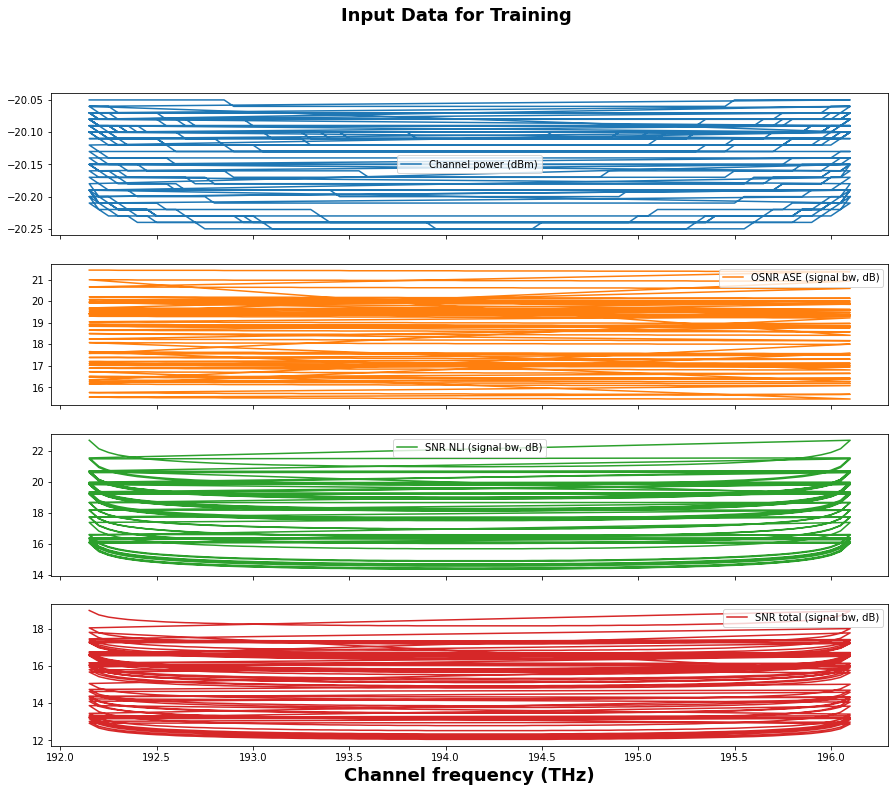

In [ ]:
plot_cols = ['Channel power (dBm)', 'OSNR ASE (signal bw, dB)', 'SNR NLI (signal bw, dB)', 'SNR total (signal bw, dB)']
plot_features = df_train[plot_cols]
plot_features.index = df_train['Channel frequency (THz)']
_ = plot_features.plot(subplots=True, figsize=(15, 12))

# Set x-axis label
plt.xlabel('Channel frequency (THz)', weight='bold').set_fontsize('18')
plt.suptitle('Input Data for Training', weight='bold').set_fontsize('18')

# Saving the Images:
plt.savefig('Input Data for Modeling.png')

**Make X & Y Variables from the Data, and Perform Data Splitting - 80% train set and 20% val set**

In [ ]:
# For Training Set:
y_ = df_train['SNR total (signal bw, dB)']
x_ = df_train.iloc[:, :-1]

# For Testing Set:
y_test = df_test['SNR total (signal bw, dB)']
X_test = df_test.iloc[:, :-1]

X_train, X_val, y_train, y_val = train_test_split(x_, y_, test_size=0.20, random_state=42)

**Normalize the data:**

It is important to scale features before training a neural network. Normalization is a common way of doing this scaling: subtract the mean and divide by the standard deviation of each feature.

In [ ]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_valid = scaler.transform(X_val)
X_test = scaler.transform(X_test)

# Convert the targets to arrays:
y_train = y_train.values
y_val = y_val.values
y_test = y_test.values

**Peek at the distribution of the features**

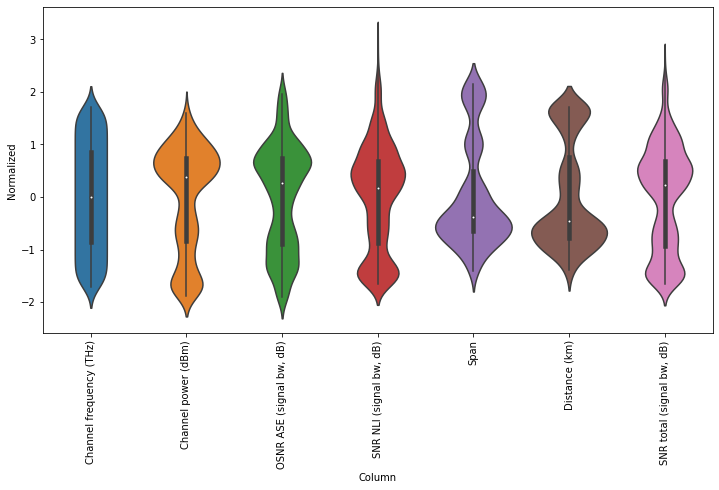

In [ ]:
train_mean = df_train.mean()
train_std = df_train.std()

df_std = (df_train - train_mean) / train_std
df_std = df_std.melt(var_name='Column', value_name='Normalized')
plt.figure(figsize=(12, 6))
ax = sns.violinplot(x='Column', y='Normalized', data=df_std)
_ = ax.set_xticklabels(df_train.keys(), rotation=90)

# Some features do have long tails, but there are no obvious errors.

**Define Random Seed**

In [ ]:
keras.backend.clear_session()
np.random.seed(42)
tf.random.set_seed(42)

**Define the Evaluation Metrics**

In [ ]:
def MAE(pred, true):
    return tf.reduce_mean(tf.abs(pred - true))


def MSE(pred, true):
    return tf.reduce_mean((pred - true) ** 2)


def RMSE(pred, true):
    return tf.sqrt(MSE(pred, true))


def MAPE(pred, true):
    return tf.reduce_mean(tf.abs((pred - true) / true)) * 100


def metric(pred, true):
    mae = MAE(pred, true)
    mse = MSE(pred, true)
    rmse = RMSE(pred, true)
    mape = MAPE(pred, true)

    return mae, mse, rmse, mape

**Print the shape of the dataset**

In [ ]:
print(X_train.shape)
print(X_val.shape)
print(X_test.shape)
print(y_train.shape)
print(y_val.shape)
print(y_test.shape)

(2560, 6)
(640, 6)
(80, 6)
(2560,)
(640,)
(80,)


**Model 1 - Random Forest (RF) Regressor:**

Here, we use Random Forest Regressor to fit to our training dataset & predict results.

In [ ]:
# instantiate the Regressor and fit to training data
start = time.time()

rf = RandomForestRegressor()
rf.fit(X_train, y_train)

end = time.time()
print('Time Taken: %.3f seconds' % (end-start))

# viewing params of random forest
rf.get_params()

all_models = list()
performance_all = {}

# making predictions on test set
start = time.time()

y_pred_rf = rf.predict(X_test)

end = time.time()
print('Time Taken: %.3f seconds' % (end-start))

print('Mean Absolute Error:', MAE(y_pred_rf, y_test))
print('Root Mean Square Error:', RMSE(y_pred_rf, y_test))
print('Mean Absolute Percentage Error:', MAPE(y_pred_rf, y_test))

performance_all['RF_Model'] = MAE(y_pred_rf, y_test), RMSE(y_pred_rf, y_test), MAPE(y_pred_rf, y_test)

model1 = rf
all_models.append(model1)

Time Taken: 0.653 seconds
Time Taken: 0.009 seconds
Mean Absolute Error: tf.Tensor(0.6002912500000004, shape=(), dtype=float64)
Root Mean Square Error: tf.Tensor(0.6170961631909572, shape=(), dtype=float64)
Mean Absolute Percentage Error: tf.Tensor(3.095742520933848, shape=(), dtype=float64)


**Data Pre-processing for Model 2**

In [ ]:
"""
    Upload the Simulation Training Data from the Gaussian Model Software for the Optical
    Communication network between Sheffield to London and Sheffield to Endinburgh.
"""
# Training Set - Optical Network from Sheffield to London and Ffom Sheffield to Endingurgh
df_train = pd.read_csv('/content/gdrive/MyDrive/Sheffield_London__Sheffield_Endinburgh_35_TRAIN.csv')

# Testing Set - Optical Network from Belfast to Glasgow
df_test = pd.read_csv('/content/gdrive/MyDrive/Belfast_Glasgow_35_TEST.csv')

"""
   i. Make X & Y Variables from the Data:
"""
# For Training Set:
y_ = df_train['SNR total (signal bw, dB)']
x_ = df_train.iloc[:, :-1]

# For Testing Set:
y_test = df_test['SNR total (signal bw, dB)']
X_test = df_test.iloc[:, :-1]

"""
   ii. Data Splitting - 80% train set and 20% val set:
"""
X_train, X_val, y_train, y_val = train_test_split(x_, y_, test_size=0.20, random_state=42)

"""
    Normalize the data:
    It is important to scale features before training a neural network. Normalization is a
    common way of doing this scaling: subtract the mean and divide by the standard deviation
    of each feature.
"""

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_valid = scaler.transform(X_val)
X_test = scaler.transform(X_test)

# Convert the targets to arrays:
y_train = y_train.values
y_val = y_val.values
y_test = y_test.values

**Model 2 - Support Vector Machine (SVM):**

Similar to RF Model, we'll fit SVM on our training dataset and check its performance on test data.

In [ ]:
# instantiate and fit SVM to train data

svc = SVR(C=1.0, epsilon=0.2)
clf = svc
clf.fit(X_train, y_train)

# check parameters of SVM
clf.get_params()

# making predictions on test set
start = time.time()

y_pred_svc = clf.predict(X_test)

end = time.time()
print('Time Taken: %.3f seconds' % (end-start))

print('Mean Absolute Error:', MAE(y_pred_svc, y_test))
print('Root Mean Square Error:', RMSE(y_pred_svc, y_test))
print('Mean Absolute Percentage Error:', MAPE(y_pred_svc, y_test))

performance_all['SVC_Model'] = MAE(y_pred_svc, y_test), RMSE(y_pred_svc, y_test), MAPE(y_pred_svc, y_test)

model2 = clf
all_models.append(model2)

Time Taken: 0.001 seconds
Mean Absolute Error: tf.Tensor(1.0629888299326313, shape=(), dtype=float64)
Root Mean Square Error: tf.Tensor(1.108937997325214, shape=(), dtype=float64)
Mean Absolute Percentage Error: tf.Tensor(5.479503732540591, shape=(), dtype=float64)


**Data Pre-processing for Model 3**

In [ ]:
"""
    Upload the Simulation Training Data from the Gaussian Model Software for the Optical
    Communication network between Sheffield to London and Sheffield to Endinburgh.
"""
# Training Set - Optical Network from Sheffield to London and Ffom Sheffield to Endingurgh
df_train = pd.read_csv('/content/gdrive/MyDrive/Sheffield_London__Sheffield_Endinburgh_35_TRAIN.csv')

# Testing Set - Optical Network from Belfast to Glasgow
df_test = pd.read_csv('/content/gdrive/MyDrive/Belfast_Glasgow_35_TEST.csv')

"""
   i. Make X & Y Variables from the Data:
"""
# For Training Set:
y_ = df_train['SNR total (signal bw, dB)']
x_ = df_train.iloc[:, :-1]

# For Testing Set:
y_test = df_test['SNR total (signal bw, dB)']
X_test = df_test.iloc[:, :-1]

"""
   ii. Data Splitting - 80% train set and 20% val set:
"""
X_train, X_val, y_train, y_val = train_test_split(x_, y_, test_size=0.20, random_state=42)

"""
    Normalize the data:
    It is important to scale features before training a neural network. Normalization is a
    common way of doing this scaling: subtract the mean and divide by the standard deviation
    of each feature.
"""

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_valid = scaler.transform(X_val)
X_test = scaler.transform(X_test)

# Convert the targets to arrays:
y_train = y_train.values
y_val = y_val.values
y_test = y_test.values

**Model 3:**

Build a Simple Multi-Layer Perceptron (MLP) Regression Model Uisng Subclassing API And Optimize the Hyperparameters:

In [ ]:
%load_ext tensorboard

def build_model(n_hidden=1, n_neurons=30, learning_rate=3e-3, input_shape=[6]):
    model = keras.models.Sequential()
    model.add(keras.layers.InputLayer(input_shape=input_shape))
    for layer in range(n_hidden):
        model.add(keras.layers.Dense(n_neurons, kernel_initializer="he_normal", activation="relu"))
        model.add(keras.layers.BatchNormalization())
        model.add(keras.layers.Activation("relu"))
    model.add(keras.layers.Dense(1))
    optimizer = keras.optimizers.SGD(learning_rate=learning_rate)
    model.compile(loss="mse", optimizer=optimizer, metrics=[MAE, RMSE, MAPE])
    return model

early_stopping_cb = keras.callbacks.EarlyStopping(patience=10)
model_checkpoint_cb = keras.callbacks.ModelCheckpoint("MLP.h5", save_best_only=True)
run_index = 1 # increment every time you train the model
run_logdir = os.path.join(os.curdir, "my_MLP_logs", "run_bn_{:03d}".format(run_index))
tensorboard_cb = keras.callbacks.TensorBoard(run_logdir)
callbacks = [early_stopping_cb, model_checkpoint_cb, tensorboard_cb]

"""
    Hyperparameters Optimization Using Randomized Search Algorithm
"""
keras_reg = keras.wrappers.scikit_learn.KerasRegressor(build_model)

param_distribs = {
    "n_hidden": [1, 2, 3],
    "n_neurons": np.arange(1, 100)               .tolist(),
    "learning_rate": reciprocal(3e-4, 3e-2)      .rvs(1000).tolist(),
}

rnd_search_cv = RandomizedSearchCV(keras_reg, param_distribs, n_iter=10, cv=3, verbose=2)
rnd_search_cv.fit(X_train, y_train, epochs=10,
                  validation_data=(X_val, y_val),
                  callbacks=callbacks)

<ipython-input-22-1080da9d1c9c>:25: DeprecationWarning: KerasRegressor is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  keras_reg = keras.wrappers.scikit_learn.KerasRegressor(build_model)


Fitting 3 folds for each of 10 candidates, totalling 30 fits
Epoch 1/10
54/54 [==============================] - 4s 26ms/step - loss: 52.6913 - MAE: 5.7887 - RMSE: 6.4036 - MAPE: 786.4325 - val_loss: 26881604.0000 - val_MAE: 4826.4971 - val_RMSE: 5177.4058 - val_MAPE: 99.6337
Epoch 2/10
54/54 [==============================] - 0s 7ms/step - loss: 7.6127 - MAE: 2.2039 - RMSE: 2.6863 - MAPE: 17.0279 - val_loss: 34689380.0000 - val_MAE: 5468.3848 - val_RMSE: 5881.1113 - val_MAPE: 99.6748
Epoch 3/10
54/54 [==============================] - 0s 6ms/step - loss: 5.9644 - MAE: 1.9104 - RMSE: 2.3632 - MAPE: 14.1104 - val_loss: 40931228.0000 - val_MAE: 5933.4189 - val_RMSE: 6388.2383 - val_MAPE: 99.6989
Epoch 4/10
54/54 [==============================] - 0s 5ms/step - loss: 4.8978 - MAE: 1.7681 - RMSE: 2.1550 - MAPE: 12.8586 - val_loss: 51769284.0000 - val_MAE: 6677.8374 - val_RMSE: 7184.4658 - val_MAPE: 99.7326
Epoch 5/10
54/54 [==============================] - 0s 6ms/step - loss: 3.5094 - MAE

**Obtain the best Parameters, Score, trained model, and use it for evaluation**

In [ ]:
print(rnd_search_cv.best_params_)
print(rnd_search_cv.best_score_)
rnd_search_cv.score(X_test, y_test)

model = rnd_search_cv.best_estimator_.model
model.evaluate(X_test, y_test)

**Make Predictions with the best trained Model:**

In [ ]:
y_pred_MLP = model.predict(X_test)
performance_all['MLP_Model'] = MAE(y_pred_MLP, y_test), RMSE(y_pred_MLP, y_test), MAPE(y_pred_MLP, y_test)

**View the Model's Structure**

In [ ]:
model.summary()

**Data Pre-processing for Model 4**

In [ ]:
"""
    Upload the Simulation Training Data from the Gaussian Model Software for the Optical
    Communication network between Sheffield to London and Sheffield to Endinburgh.
"""
# Training Set - Optical Network from Sheffield to London and Ffom Sheffield to Endingurgh
df_train = pd.read_csv('/content/gdrive/MyDrive/Sheffield_London__Sheffield_Endinburgh_35_TRAIN.csv')

# Testing Set - Optical Network from Belfast to Glasgow
df_test = pd.read_csv('/content/gdrive/MyDrive/Belfast_Glasgow_35_TEST.csv')

"""
   i. Make X & Y Variables from the Data:
"""
# For Training Set:
y_ = df_train['SNR total (signal bw, dB)']
x_ = df_train.iloc[:, :-1]

# For Testing Set:
y_test = df_test['SNR total (signal bw, dB)']
X_test = df_test.iloc[:, :-1]

"""
   ii. Data Splitting - 80% train set and 20% val set:
"""
X_train, X_val, y_train, y_val = train_test_split(x_, y_, test_size=0.20, random_state=42)

"""
    Normalize the data:
    It is important to scale features before training a neural network. Normalization is a
    common way of doing this scaling: subtract the mean and divide by the standard deviation
    of each feature.
"""

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_valid = scaler.transform(X_val)
X_test = scaler.transform(X_test)

# Convert the targets to arrays:
y_train = y_train.values
y_val = y_val.values
y_test = y_test.values

**Model 4 - Convolutional Neural Network (CNN)**

**Compile, Build, and Perform Hyperparameters Optimization in order to Build the Deep Learning CNN Model:**

We will apply the CNN algorithm to our data to generate prediction results. First, we need to reshape our data for CNN.

We will use 1-dimensional CNN for our model, reshaping our data as per the dimensions of our CNN

Note that the timeseries data used here are univariate, meaning we only have one channel per timeseries example.
We will therefore transform the timeseries into a multivariate one with one channel using a simple
reshaping via numpy. This will allow us to construct a model that is easily applicable to multivariate time series



In [ ]:
X_val = X_val.values
# Reshape the Data:
X_train = X_train.reshape(len(X_train), X_train.shape[1], 1)
X_val = X_val.reshape(len(X_val), X_val.shape[1], 1)
X_test = X_test.reshape(len(X_test), X_test.shape[1], 1)
print(X_train.shape, X_val, X_test.shape)

%load_ext tensorboard

def build_model(n_hidden=1, n_neurons=30, learning_rate=3e-3, input_shape=(6, 1)):
    model = keras.models.Sequential()
    model.add(keras.layers.InputLayer(input_shape=input_shape))
    for layer in range(n_hidden):
        model.add(Conv1D(n_neurons, kernel_size=2, activation='relu',
                    padding='same', input_shape=(6, 1)))
        model.add(keras.layers.BatchNormalization())
        model.add(MaxPooling1D(pool_size=(3), strides=2, padding='same'))
        model.add(keras.layers.Activation("relu"))
        model.add(Dropout(0.2))
    model.add(keras.layers.Dense(1))
    optimizer = keras.optimizers.SGD(learning_rate=learning_rate)
    model.compile(loss="mse", optimizer=optimizer, metrics=[MAE, RMSE, MAPE])
    return model

early_stopping_cb = keras.callbacks.EarlyStopping(patience=10)
model_checkpoint_cb = keras.callbacks.ModelCheckpoint("CNN.h5", save_best_only=True)
run_index = 1 # increment every time you train the model
run_logdir = os.path.join(os.curdir, "my_CNN_logs", "run_bn_{:03d}".format(run_index))
tensorboard_cb = keras.callbacks.TensorBoard(run_logdir)
callbacks = [early_stopping_cb, model_checkpoint_cb, tensorboard_cb]

"""
    Hyperparameters Optimization Using Randomized Search Algorithm
"""
keras_reg = keras.wrappers.scikit_learn.KerasRegressor(build_model)

param_distribs = {
    "n_hidden": [1, 2, 3],
    "n_neurons": np.arange(1, 100)               .tolist(),
    "learning_rate": reciprocal(3e-4, 3e-2)      .rvs(1000).tolist(),
}

rnd_search_cv = RandomizedSearchCV(keras_reg, param_distribs, n_iter=10, cv=3, verbose=2)
rnd_search_cv.fit(X_train, y_train, epochs=10,
                  validation_data=(X_val, y_val),
                  callbacks=callbacks)

(2560, 6, 1) [[[ 195.35]
  [ -20.19]
  [  16.82]
  [  15.85]
  [  11.  ]
  [ 908.  ]]

 [[ 195.05]
  [ -20.23]
  [  16.27]
  [  14.99]
  [  13.  ]
  [1131.  ]]

 [[ 192.95]
  [ -20.18]
  [  17.  ]
  [  16.2 ]
  [  10.  ]
  [ 845.  ]]

 ...

 [[ 192.2 ]
  [ -20.09]
  [  19.54]
  [  19.42]
  [   7.  ]
  [ 448.  ]]

 [[ 194.25]
  [ -20.09]
  [  19.89]
  [  18.99]
  [   6.  ]
  [ 398.  ]]

 [[ 194.7 ]
  [ -20.08]
  [  20.95]
  [  19.02]
  [   5.  ]
  [ 398.  ]]] (80, 6, 1)
The tensorboard extension is already loaded. To reload it, use:
  %reload_ext tensorboard
Fitting 3 folds for each of 10 candidates, totalling 30 fits


<ipython-input-27-a3999ba77136>:35: DeprecationWarning: KerasRegressor is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  keras_reg = keras.wrappers.scikit_learn.KerasRegressor(build_model)


Epoch 1/10
54/54 [==============================] - 2s 11ms/step - loss: 23.6844 - MAE: 3.6629 - RMSE: 4.3973 - MAPE: 1174.3573 - val_loss: 990871.1875 - val_MAE: 900.1107 - val_RMSE: 993.6566 - val_MAPE: 98.0137
Epoch 2/10
54/54 [==============================] - 0s 4ms/step - loss: 8.5255 - MAE: 2.3274 - RMSE: 2.9037 - MAPE: 17.4184 - val_loss: 929454.1250 - val_MAE: 872.7995 - val_RMSE: 962.3785 - val_MAPE: 97.9588
Epoch 3/10
54/54 [==============================] - 0s 5ms/step - loss: 6.7695 - MAE: 2.0966 - RMSE: 2.5922 - MAPE: 15.2607 - val_loss: 1227010.5000 - val_MAE: 1005.9453 - val_RMSE: 1105.7461 - val_MAPE: 98.2340
Epoch 4/10
54/54 [==============================] - 0s 4ms/step - loss: 5.9457 - MAE: 1.9757 - RMSE: 2.4423 - MAPE: 14.1600 - val_loss: 1210839.7500 - val_MAE: 1002.0350 - val_RMSE: 1098.4296 - val_MAPE: 98.2351
Epoch 5/10
54/54 [==============================] - 0s 4ms/step - loss: 5.5236 - MAE: 1.9006 - RMSE: 2.3415 - MAPE: 13.5281 - val_loss: 1256037.7500 - val

RandomizedSearchCV(cv=3,
                   estimator=<keras.wrappers.scikit_learn.KerasRegressor object at 0x7f91f3f92e50>,
                   param_distributions={'learning_rate': [0.016767776751771987,
                                                          0.027879706220566198,
                                                          0.010319724003926604,
                                                          0.002054257205865781,
                                                          0.002088503749409412,
                                                          0.008959542994999879,
                                                          0.0009008978412536868,
                                                          0.0004989643083159175,
                                                          0.0015359092997378394,
                                                          0.00112615777105582...
                                                          0.02382558772

**Obtain the best Parameters, Score, Best Trained Model and Use it for Evaluation**

In [ ]:
print(rnd_search_cv.best_params_)
print(rnd_search_cv.best_score_)
rnd_search_cv.score(X_test, y_test)

model = rnd_search_cv.best_estimator_.model
model.evaluate(X_test, y_test)

{'n_neurons': 2, 'n_hidden': 1, 'learning_rate': 0.014487331183657765}
-2.8261852264404297
3/3 [==============================] - 0s 4ms/step - loss: 21.1167 - MAE: 4.6119 - RMSE: 4.6137 - MAPE: 31.2368


[21.11666488647461, 4.611917018890381, 4.613735675811768, 31.23679542541504]

**Make Predictions with the trained Model**

In [ ]:
y_pred_CNN = model.predict(X_test)
performance_all['CNN_Model'] = MAE(y_pred_CNN, y_test), RMSE(y_pred_CNN, y_test), MAPE(y_pred_CNN, y_test)

3/3 [==============================] - 0s 4ms/step


**View the Model's Structure**

In [ ]:
model.summary()

Model: "sequential_61"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d_48 (Conv1D)          (None, 6, 2)              6         
                                                                 
 batch_normalization_112 (Ba  (None, 6, 2)             8         
 tchNormalization)                                               
                                                                 
 max_pooling1d_48 (MaxPoolin  (None, 3, 2)             0         
 g1D)                                                            
                                                                 
 activation_112 (Activation)  (None, 3, 2)             0         
                                                                 
 dropout_48 (Dropout)        (None, 3, 2)              0         
                                                                 
 dense_125 (Dense)           (None, 3, 1)            

**Data Pre-processing for Model 5**

In [ ]:
"""
    Upload the Simulation Training Data from the Gaussian Model Software for the Optical
    Communication network between Sheffield to London and Sheffield to Endinburgh.
"""
# Training Set - Optical Network from Sheffield to London and Ffom Sheffield to Endingurgh
df_train = pd.read_csv('/content/gdrive/MyDrive/Sheffield_London__Sheffield_Endinburgh_35_TRAIN.csv')

# Testing Set - Optical Network from Belfast to Glasgow
df_test = pd.read_csv('/content/gdrive/MyDrive/Belfast_Glasgow_35_TEST.csv')

"""
   i. Make X & Y Variables from the Data:
"""
# For Training Set:
y_ = df_train['SNR total (signal bw, dB)']
x_ = df_train.iloc[:, :-1]

# For Testing Set:
y_test = df_test['SNR total (signal bw, dB)']
X_test = df_test.iloc[:, :-1]

"""
   ii. Data Splitting - 80% train set and 20% val set:
"""
X_train, X_val, y_train, y_val = train_test_split(x_, y_, test_size=0.20, random_state=42)

"""
    Normalize the data:
    It is important to scale features before training a neural network. Normalization is a
    common way of doing this scaling: subtract the mean and divide by the standard deviation
    of each feature.
"""

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_valid = scaler.transform(X_val)
X_test = scaler.transform(X_test)

# Convert the targets to arrays:
y_train = y_train.values
y_val = y_val.values
y_test = y_test.values

**Model 5 - Build the Long Short Term Memory Neural Network (LSTM) and Perform Hyperparameters Optimization Using Randomized Search Algorithm**

In [ ]:
%load_ext tensorboard

def build_model(n_hidden=1, n_neurons=30, learning_rate=3e-3, input_shape=(6, 1)):
    model = keras.models.Sequential()
    model.add(keras.layers.InputLayer(input_shape=input_shape))
    for layer in range(n_hidden):
        model.add(keras.layers.LSTM(n_neurons, return_sequences=True, activation="relu"))
        model.add(keras.layers.BatchNormalization())
        model.add(keras.layers.Activation("relu"))
        model.add(Dropout(0.2))
    model.add(keras.layers.Dense(1))
    optimizer = keras.optimizers.SGD(learning_rate=learning_rate)
    model.compile(loss="mse", optimizer=optimizer, metrics=[MAE, RMSE, MAPE])
    return model

early_stopping_cb = keras.callbacks.EarlyStopping(patience=10)
model_checkpoint_cb = keras.callbacks.ModelCheckpoint("LSTM.h5", save_best_only=True)
run_index = 1 # increment every time you train the model
run_logdir = os.path.join(os.curdir, "my_LSTM_logs", "run_bn_{:03d}".format(run_index))
tensorboard_cb = keras.callbacks.TensorBoard(run_logdir)
callbacks = [early_stopping_cb, model_checkpoint_cb, tensorboard_cb]

"""
    Hyperparameters Optimization Using Randomized Search Algorithm
"""
keras_reg = keras.wrappers.scikit_learn.KerasRegressor(build_model)

param_distribs = {
    "n_hidden": [1, 2, 3],
    "n_neurons": np.arange(1, 100)               .tolist(),
    "learning_rate": reciprocal(3e-4, 3e-2)      .rvs(1000).tolist(),
}

rnd_search_cv = RandomizedSearchCV(keras_reg, param_distribs, n_iter=10, cv=3, verbose=2)
rnd_search_cv.fit(X_train, y_train, epochs=10,
                  validation_data=(X_val, y_val),
                  callbacks=callbacks)

The tensorboard extension is already loaded. To reload it, use:
  %reload_ext tensorboard
Fitting 3 folds for each of 10 candidates, totalling 30 fits


<ipython-input-32-3cafbd187ad9>:26: DeprecationWarning: KerasRegressor is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  keras_reg = keras.wrappers.scikit_learn.KerasRegressor(build_model)


Epoch 1/10
54/54 [==============================] - 4s 22ms/step - loss: 28.4081 - MAE: 3.7249 - RMSE: 4.3651 - MAPE: inf - val_loss: 2004.9446 - val_MAE: 35.7576 - val_RMSE: 44.7570 - val_MAPE: 60.1178
Epoch 2/10
54/54 [==============================] - 1s 15ms/step - loss: 6.7434 - MAE: 2.0762 - RMSE: 2.5855 - MAPE: 15.1145 - val_loss: 2991.2151 - val_MAE: 41.8753 - val_RMSE: 54.6541 - val_MAPE: 62.5124
Epoch 3/10
54/54 [==============================] - 1s 11ms/step - loss: 5.7761 - MAE: 1.9375 - RMSE: 2.3964 - MAPE: 13.8557 - val_loss: 7073.6079 - val_MAE: 62.3007 - val_RMSE: 84.0379 - val_MAPE: 67.7423
Epoch 4/10
54/54 [==============================] - 1s 12ms/step - loss: 5.3279 - MAE: 1.8743 - RMSE: 2.3083 - MAPE: 13.2916 - val_loss: 10049.2344 - val_MAE: 71.7017 - val_RMSE: 100.1302 - val_MAPE: 70.0315
Epoch 5/10
54/54 [==============================] - 1s 11ms/step - loss: 5.0091 - MAE: 1.8174 - RMSE: 2.2337 - MAPE: 12.7892 - val_loss: 10427.5488 - val_MAE: 72.8007 - val_RMSE

RandomizedSearchCV(cv=3,
                   estimator=<keras.wrappers.scikit_learn.KerasRegressor object at 0x7f91fc6aeeb0>,
                   param_distributions={'learning_rate': [0.0009871040288905357,
                                                          0.0006405218680608259,
                                                          0.0013726233562120866,
                                                          0.00978642937022827,
                                                          0.0032801444822271346,
                                                          0.0007706972387859703,
                                                          0.017091548472271314,
                                                          0.01722998758911675,
                                                          0.016530199872504456,
                                                          0.00090097694391136...
                                                          0.00048760556

**Obtain the best Parameters, Score, and Best Trained Model and Use it for Evaluation**

In [ ]:
print(rnd_search_cv.best_params_)
print(rnd_search_cv.best_score_)
rnd_search_cv.score(X_test, y_test)

model = rnd_search_cv.best_estimator_.model
model.evaluate(X_test, y_test)

{'n_neurons': 12, 'n_hidden': 1, 'learning_rate': 0.02085020344364959}
-3.0356191794077554
3/3 [==============================] - 0s 5ms/step - loss: 18.8781 - MAE: 4.3479 - RMSE: 4.3564 - MAPE: 28.9632


[18.878076553344727, 4.347929000854492, 4.35638427734375, 28.963228225708008]

**Make Predictions with the Best trained Model:**

In [ ]:
y_pred_LSTM = model.predict(X_test)
performance_all['LSTM_Model'] = MAE(y_pred_LSTM, y_test), RMSE(y_pred_LSTM, y_test), MAPE(y_pred_LSTM, y_test)

3/3 [==============================] - 0s 4ms/step


**View the Model's Structure**

In [ ]:
model.summary()

Model: "sequential_92"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_60 (LSTM)              (None, 6, 12)             672       
                                                                 
 batch_normalization_173 (Ba  (None, 6, 12)            48        
 tchNormalization)                                               
                                                                 
 activation_173 (Activation)  (None, 6, 12)            0         
                                                                 
 dropout_109 (Dropout)       (None, 6, 12)             0         
                                                                 
 dense_156 (Dense)           (None, 6, 1)              13        
                                                                 
Total params: 733
Trainable params: 709
Non-trainable params: 24
______________________________________________________

**Data Pre-processing for Model 6**

In [ ]:
"""
    Upload the Simulation Training Data from the Gaussian Model Software for the Optical
    Communication network between Sheffield to London and Sheffield to Endinburgh.
"""
# Training Set - Optical Network from Sheffield to London and Ffom Sheffield to Endingurgh
df_train = pd.read_csv('/content/gdrive/MyDrive/Sheffield_London__Sheffield_Endinburgh_35_TRAIN.csv')

# Testing Set - Optical Network from Belfast to Glasgow
df_test = pd.read_csv('/content/gdrive/MyDrive/Belfast_Glasgow_35_TEST.csv')

"""
   i. Make X & Y Variables from the Data:
"""
# For Training Set:
y_ = df_train['SNR total (signal bw, dB)']
x_ = df_train.iloc[:, :-1]

# For Testing Set:
y_test = df_test['SNR total (signal bw, dB)']
X_test = df_test.iloc[:, :-1]

"""
   ii. Data Splitting - 80% train set and 20% val set:
"""
X_train, X_val, y_train, y_val = train_test_split(x_, y_, test_size=0.20, random_state=42)

"""
    Normalize the data:
    It is important to scale features before training a neural network. Normalization is a
    common way of doing this scaling: subtract the mean and divide by the standard deviation
    of each feature.
"""

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_valid = scaler.transform(X_val)
X_test = scaler.transform(X_test)

# Convert the targets to arrays:
y_train = y_train.values
y_val = y_val.values
y_test = y_test.values

**Model 6 - Gated Recurrent Unit Neural Network (GRU) and Perform Hyperparameters Optimization Using Randomized Search Algorithm**

In [ ]:
%load_ext tensorboard

def build_model(n_hidden=1, n_neurons=30, learning_rate=3e-3, input_shape=(6, 1)):
    model = keras.models.Sequential()
    model.add(keras.layers.InputLayer(input_shape=input_shape))
    for layer in range(n_hidden):
        model.add(keras.layers.GRU(n_neurons, return_sequences=True, activation="relu"))
        model.add(keras.layers.BatchNormalization())
        model.add(keras.layers.Activation("relu"))
        model.add(Dropout(0.2))
    model.add(keras.layers.Dense(1))
    optimizer = keras.optimizers.SGD(learning_rate=learning_rate)
    model.compile(loss="mse", optimizer=optimizer, metrics=[MAE, RMSE, MAPE])
    return model

early_stopping_cb = keras.callbacks.EarlyStopping(patience=10)
model_checkpoint_cb = keras.callbacks.ModelCheckpoint("GRU.h5", save_best_only=True)
run_index = 1 # increment every time you train the model
run_logdir = os.path.join(os.curdir, "my_GRU_logs", "run_bn_{:03d}".format(run_index))
tensorboard_cb = keras.callbacks.TensorBoard(run_logdir)
callbacks = [early_stopping_cb, model_checkpoint_cb, tensorboard_cb]

"""
    Hyperparameters Optimization Using Randomized Search Algorithm
"""
keras_reg = keras.wrappers.scikit_learn.KerasRegressor(build_model)

param_distribs = {
    "n_hidden": [1, 2, 3],
    "n_neurons": np.arange(1, 100)               .tolist(),
    "learning_rate": reciprocal(3e-4, 3e-2)      .rvs(1000).tolist(),
}

rnd_search_cv = RandomizedSearchCV(keras_reg, param_distribs, n_iter=10, cv=3, verbose=2)
rnd_search_cv.fit(X_train, y_train, epochs=10,
                  validation_data=(X_val, y_val),
                  callbacks=callbacks)

**Obtain the best Parameters, Score, Best Trained Model and Use it for Evaluation**

In [ ]:
print(rnd_search_cv.best_params_)
print(rnd_search_cv.best_score_)
rnd_search_cv.score(X_test, y_test)

model = rnd_search_cv.best_estimator_.model
model.evaluate(X_test, y_test)

{'n_neurons': 91, 'n_hidden': 3, 'learning_rate': 0.027253630587061345}
-3.333937406539917
3/3 [==============================] - 0s 9ms/step - loss: 25.3647 - MAE: 5.0804 - RMSE: 5.0867 - MAPE: 35.5822


[25.364652633666992, 5.080356121063232, 5.0867228507995605, 35.582244873046875]

**Make Predictions with the Best trained Model**

In [ ]:
y_pred_GRU = model.predict(X_test)
performance_all['GRU_Model'] = MAE(y_pred_GRU, y_test), RMSE(y_pred_GRU, y_test), MAPE(y_pred_GRU, y_test)

3/3 [==============================] - 1s 9ms/step


**View the Model's Structure**

In [ ]:
model.summary()

Model: "sequential_123"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 gru_60 (GRU)                (None, 6, 91)             25662     
                                                                 
 batch_normalization_234 (Ba  (None, 6, 91)            364       
 tchNormalization)                                               
                                                                 
 activation_234 (Activation)  (None, 6, 91)            0         
                                                                 
 dropout_170 (Dropout)       (None, 6, 91)             0         
                                                                 
 gru_61 (GRU)                (None, 6, 91)             50232     
                                                                 
 batch_normalization_235 (Ba  (None, 6, 91)            364       
 tchNormalization)                                  

In [ ]:
performance_all

{'RF_Model': (<tf.Tensor: shape=(), dtype=float64, numpy=0.6002912500000004>,
  <tf.Tensor: shape=(), dtype=float64, numpy=0.6170961631909572>,
  <tf.Tensor: shape=(), dtype=float64, numpy=3.095742520933848>),
 'SVC_Model': (<tf.Tensor: shape=(), dtype=float64, numpy=1.0629888299326313>,
  <tf.Tensor: shape=(), dtype=float64, numpy=1.108937997325214>,
  <tf.Tensor: shape=(), dtype=float64, numpy=5.479503732540591>),
 'MLP_Model': (<tf.Tensor: shape=(), dtype=float64, numpy=0.19431743717193634>,
  <tf.Tensor: shape=(), dtype=float64, numpy=0.2478988157922969>,
  <tf.Tensor: shape=(), dtype=float64, numpy=0.9981610515621486>),
 'CNN_Model': (<tf.Tensor: shape=(), dtype=float64, numpy=4.592884148120878>,
  <tf.Tensor: shape=(), dtype=float64, numpy=4.595289685938298>,
  <tf.Tensor: shape=(), dtype=float64, numpy=23.722563576780935>),
 'LSTM_Model': (<tf.Tensor: shape=(), dtype=float64, numpy=4.336531202952065>,
  <tf.Tensor: shape=(), dtype=float64, numpy=4.345381715327024>,
  <tf.Tensor:

**Performance Comparison of All DL Models - MAE**

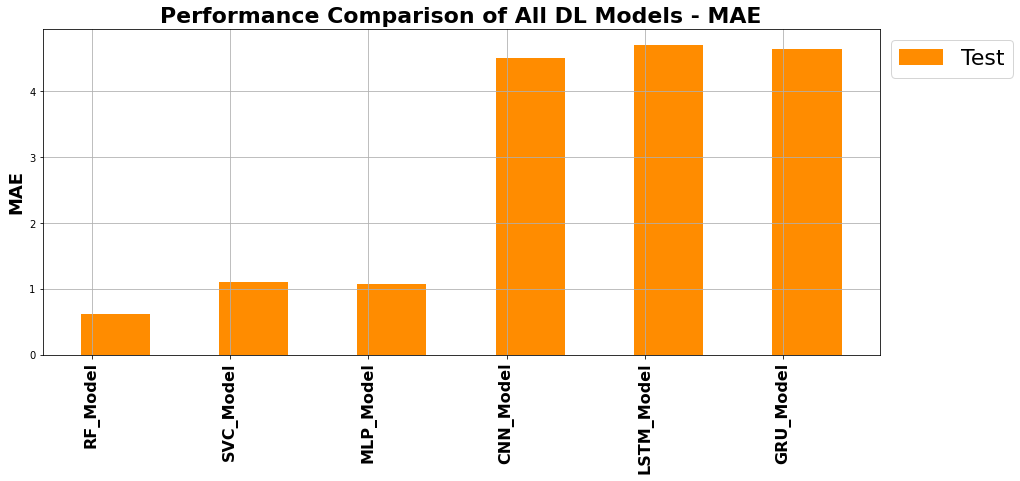

In [ ]:
x = np.arange(len(performance_all))
width = 0.5
metric_name = 'MAE'
metric_index = model.metrics_names.index('MAE')
test_accuracy = [v[metric_index] for v in performance_all.values()]

plt.figure(figsize=(15, 6))
plt.ylabel("MAE", weight='bold').set_fontsize('18')
#plt.bar(x - 0.17, val_accuracy, width, label='Validation')
plt.bar(x + 0.17, test_accuracy, width, label='Test', color = 'darkorange')
plt.xticks(ticks=x, labels=performance_all.keys(),
           rotation=90, size = 16, fontweight='bold')
plt.title('Performance Comparison of All DL Models - MAE', size = 22, fontweight='bold')
_ = plt.legend(loc = 2, bbox_to_anchor = (1.0, 1.0), ncol = 1, frameon=True, fontsize = '22')
plt.grid(True)
plt.savefig('Performance Comparison of All DL Models-MAE.png')

**Performance Comparison of All DL Models - RMSE**

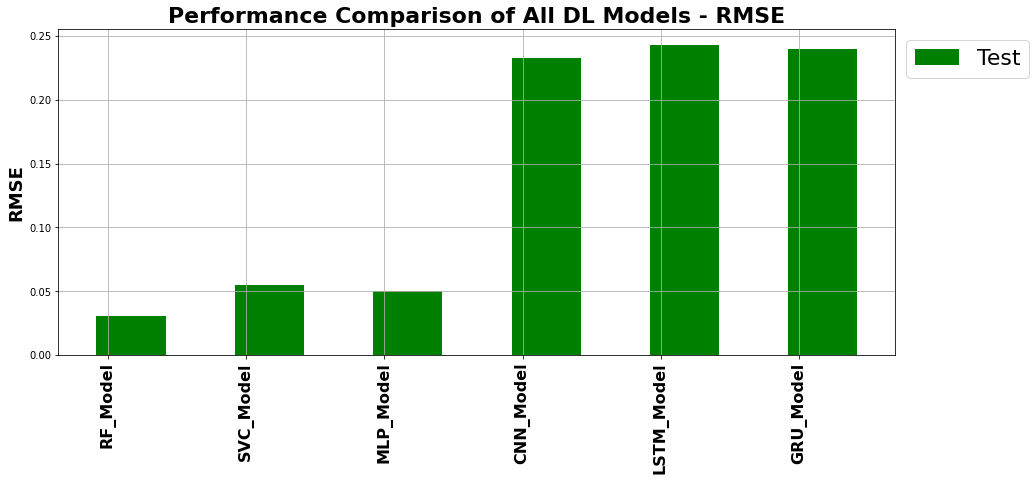

In [ ]:
x = np.arange(len(performance_all))
width = 0.5
metric_name = 'RMSE'
metric_index = model.metrics_names.index('RMSE')
test_accuracy = [v[metric_index] for v in performance_all.values()]

plt.figure(figsize=(15, 6))
plt.ylabel("RMSE", weight='bold').set_fontsize('18')
#plt.bar(x - 0.17, val_accuracy, width, label='Validation')
plt.bar(x + 0.17, test_accuracy, width, label='Test', color = 'green')
plt.xticks(ticks=x, labels=performance_all.keys(),
           rotation=90, size = 16, fontweight='bold')
plt.title('Performance Comparison of All DL Models - RMSE', size = 22, fontweight='bold')
_ = plt.legend(loc = 2, bbox_to_anchor = (1.0, 1.0), ncol = 1, frameon=True, fontsize = '22')
plt.grid(True)
plt.savefig('Performance Comparison of All DL Models-RMSE.png')

In [ ]:
performance_all.values()

dict_values([(<tf.Tensor: shape=(), dtype=float64, numpy=0.6002912500000004>, <tf.Tensor: shape=(), dtype=float64, numpy=0.6170961631909572>, <tf.Tensor: shape=(), dtype=float64, numpy=0.03095742520933848>), (<tf.Tensor: shape=(), dtype=float64, numpy=1.0629888299326313>, <tf.Tensor: shape=(), dtype=float64, numpy=1.108937997325214>, <tf.Tensor: shape=(), dtype=float64, numpy=0.054795037325405915>), (<tf.Tensor: shape=(), dtype=float64, numpy=0.9649075888395305>, <tf.Tensor: shape=(), dtype=float64, numpy=1.077064989149656>, <tf.Tensor: shape=(), dtype=float64, numpy=0.04990548687806204>), (<tf.Tensor: shape=(), dtype=float64, numpy=4.509283710479734>, <tf.Tensor: shape=(), dtype=float64, numpy=4.5117083260225606>, <tf.Tensor: shape=(), dtype=float64, numpy=0.23290656976043722>), (<tf.Tensor: shape=(), dtype=float64, numpy=4.709705494801201>, <tf.Tensor: shape=(), dtype=float64, numpy=4.7121318470347235>, <tf.Tensor: shape=(), dtype=float64, numpy=0.2432610001943479>), (<tf.Tensor: sha

**Performance Comparison between All ML and DL Models in terms of all Metrics Before Augmentation**

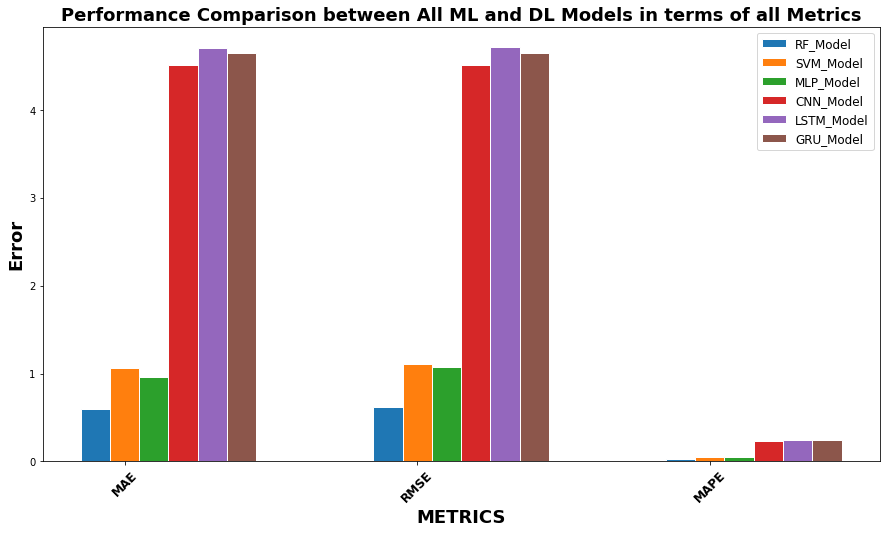

In [ ]:
RF_Model = [0.6002912500000004, 0.6170961631909572, 0.03095742520933848]
SVM_Model = [1.0629888299326313, 1.108937997325214, 0.054795037325405915]
MLP_Model = [0.9649075888395305, 1.077064989149656, 0.04990548687806204]
CNN_Model = [4.509283710479734, 4.5117083260225606, 0.23290656976043722]
LSTM_Model = [4.709705494801201, 4.7121318470347235, 0.2432610001943479]
GRU_Model = [4.647322945753731, 4.649675580133427, 0.24003811817786005]

N = 6
x = np.arange(N)
c = ['red', 'blue', 'green']
width = 0.3

# Set position of bar on X axis
r1 = np.arange(0, len(RF_Model) * 3, 3)
r2 = [x + width for x in r1]
r3 = [x + width for x in r2]
r4 = [x + width for x in r3]
r5 = [x + width for x in r4]
r6 = [x + width for x in r5]

plt.figure(figsize=(15, 8))
plt.ylabel("Error", weight='bold').set_fontsize('18')
plt.bar(r1, RF_Model, width, edgecolor='white', label='RF_Model')
plt.bar(r2, SVM_Model, width, edgecolor='white', label='SVM_Model')
plt.bar(r3, MLP_Model, width, edgecolor='white', label='MLP_Model')
plt.bar(r4, CNN_Model, width, edgecolor='white', label='CNN_Model')
plt.bar(r5, LSTM_Model, width, edgecolor='white', label='LSTM_Model')
plt.bar(r6, GRU_Model, width, edgecolor='white', label='GRU_Model')
plt.xlabel('METRICS', weight='bold').set_fontsize('18')
plt.xticks([r + width for r in range(0, len(RF_Model) * 3, 3)], ['MAE', 'RMSE', 'MAPE'], rotation=45, size = 12, fontweight='bold')
plt.title('Performance Comparison between All ML and DL Models in terms of all Metrics Before Augmentation', size = 18, fontweight='bold')
plt.legend(loc = 'best', bbox_to_anchor = (1.0, 1.0), ncol = 1, frameon=True, fontsize = '12')
plt.savefig('Performance Comparison between All ML and DL Models in terms of all Metrics.png')

Preliminary results obtained with just a few training data points (3200 training
data points) suggest that the RF and the SVM ML models performed better than
the DL models. This is expected because the DL architectures are designed to
be more efficient in handling larger datasets. It is also the reason why the
shallow MLP models performed better than the very deep DL models such as
the CNN, LSTM, and GRU models.

To this effect, we will now perform data augmentation to diversify and increase
the training data points and see how it affects the prediction accuracies of the
models.

**Data Augmentation for Sequence Data**

We will go ahead and add some diversity to the sample data. To achieve this, we can use "Data Augmentation" methods. We will use the simplest one in practice: adding some noise into real samples. The noise needs to be calibrated in order to keep the data structure, i.e it has to be small compared with the real standard deviation.

**Some Augmentation Methods**

All of the augmentation methods expect a numpy array x of size (batch, time_steps, channel) where batch is the size of the dataset or batch, time_steps is the number of time steps, and channel is the number of dimensions. Even if 1D time series are used, channel should still be 1.

1. Adding jittering, or noise, to the time series.
aug.jitter(x, sigma=0.03)

2. Scaling each time series by a constant amount.
aug.scaling(x, sigma=0.1)

3. Flipping/Rotation
aug.rotation(x)

4. Random permutation of segments. A random number of segments is used, up to max_segments.
aug.permutation(x, max_segments=5, seg_mode="equal")

5. Magnitude Warping
The magnitude of each time series is multiplied by a curve created by cubicspline with a set number of knots at random magnitudes.
aug.magnitude_warp(x, sigma=0.2, knot=4)

6. Time Warping
Random smooth time warping.
aug.time_warp(x, sigma=0.2, knot=4)

7. Window Slicing
Cropping the time series by the reduce_ratio
aug.window_slice(x, reduce_ratio=0.9)

8. Window Warping
Randomly warps a window by scales
aug.window_warp(x, window_ratio=0.1, scales=[0.5, 2.])

9. SuboPtimAl Warped time-series geNEratoR (SPAWNER)
aug.spawner(x, labels, sigma=0.05, verbose=0)

10.

**Obtain the Original Data**

In [ ]:
# Training Set - Optical Network from Sheffield to London and Ffom Sheffield to Endingurgh
df_train = pd.read_csv('/content/gdrive/MyDrive/Sheffield_London__Sheffield_Endinburgh_35_TRAIN.csv')

# Testing Set - Optical Network from Belfast to Glasgow
df_test = pd.read_csv('/content/gdrive/MyDrive/Belfast_Glasgow_35_TEST.csv')

In this study, we will use the tsaug module: a Python package for time series augmentation. It offers a set of augmentation methods for time series, as well as a simple API to connect multiple augmenters into a pipeline

In [ ]:
df_train

Channel frequency (THz)  Channel power (dBm)  OSNR ASE (signal bw, dB)  \
0                      192.15               -20.05                     21.45   
1                      192.20               -20.05                     21.45   
2                      192.25               -20.05                     21.45   
3                      192.30               -20.05                     21.44   
4                      192.35               -20.05                     21.44   
...                       ...                  ...                       ...   
3195                   195.90               -20.23                     16.18   
3196                   195.95               -20.22                     16.18   
3197                   196.00               -20.22                     16.18   
3198                   196.05               -20.21                     16.18   
3199                   196.10               -20.20                     16.18   

      SNR NLI (signal bw, dB)  Span  Distance (km)  SNR total (signal bw, dB)  
0                       22.68     4            276                      19.01  
1                       22.13     4            276                      18.77  
2                       21.89     4            276                      18.65  
3                       21.73     4            276                      18.58  
4                       21.63     4            276                      18.52  
...                       ...   ...            ...                        ...  
3195                    15.06    18           1239                      12.57  
3196                    15.16    18           1239                      12.63  
3197                    15.32    18           1239                      12.71  
3198                    15.56    18           1239                      12.85  
3199                    16.11    18           1239                      13.13  

[3200 rows x 7 columns]

**Augmenting Channel frequency (THz) data**

**Add Noise to the Channel frequency (THz) data**

tsaug.AddNoise Add random noise to time series.

The noise added to every time point of a time series is independent and identically distributed

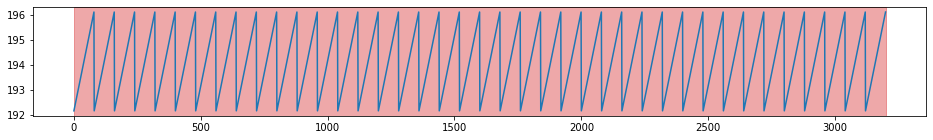

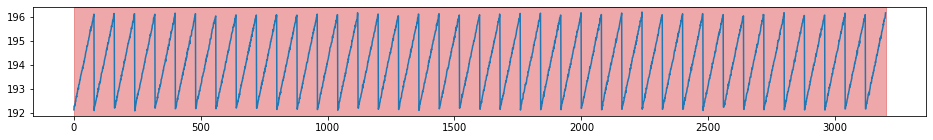

In [ ]:
x_aug1 = df_train['Channel frequency (THz)'].values
plot(x_aug1, x_aug1)

import tsaug
X_aug_cf1, Y_aug_cf1 = tsaug.AddNoise(scale=0.01).augment(x_aug1, x_aug1)

plot(X_aug_cf1, Y_aug_cf1);

**tsaug.Convolve**
Convolve time series with a kernel window.

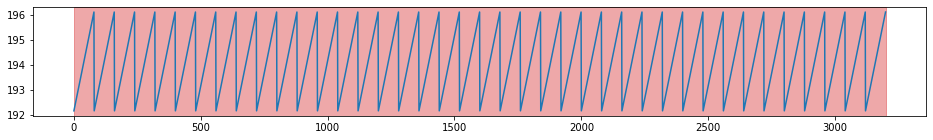

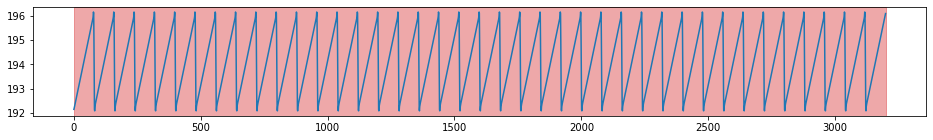

In [ ]:
x_aug1 = df_train['Channel frequency (THz)'].values
plot(x_aug1, x_aug1)

X_aug_cf2, Y_aug_cf2 = tsaug.Convolve(window="flattop", size=11).augment(x_aug1, x_aug1)

plot(X_aug_cf2, Y_aug_cf2);

**tsaug.Crop**
Crop random sub-sequences from time series.

To guarantee all output series have the same length, if the crop size is not deterministic, all crops must be resize to a fixed length.

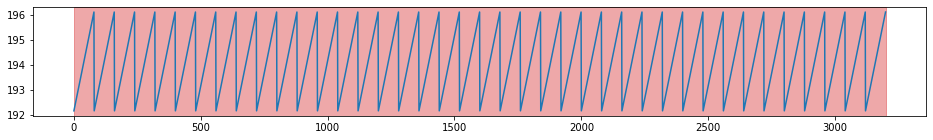

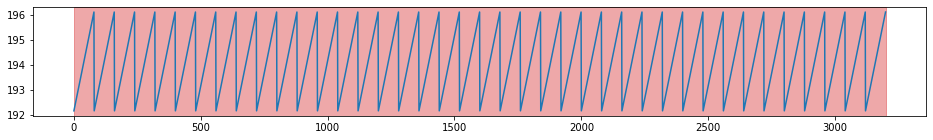

In [ ]:
x_aug1 = df_train['Channel frequency (THz)'].values
plot(x_aug1, x_aug1)

X_aug_cf3, Y_aug_cf3 = tsaug.Crop(size=3200).augment(x_aug1, x_aug1)

plot(X_aug_cf3, Y_aug_cf3);

**tsaug.Drift**
Drift the value of time series.

The augmenter drifts the value of time series from its original values randomly and smoothly. The extent of drifting is controlled by the maximal drift and the number of drift points.

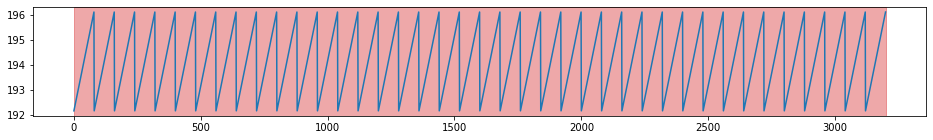

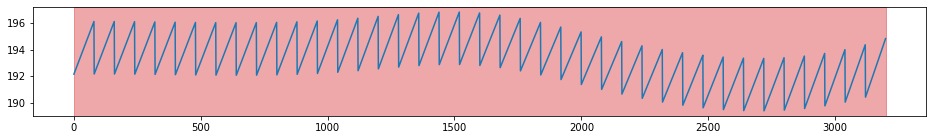

In [ ]:
x_aug1 = df_train['Channel frequency (THz)'].values
plot(x_aug1, x_aug1)

X_aug_cf4, Y_aug_cf4 = tsaug.Drift(max_drift=0.7, n_drift_points=5).augment(x_aug1, x_aug1)

plot(X_aug_cf4, Y_aug_cf4);

**tsaug.Dropout**

Dropout values of some random time points in time series.

Single time points or sub-sequences could be dropped out.

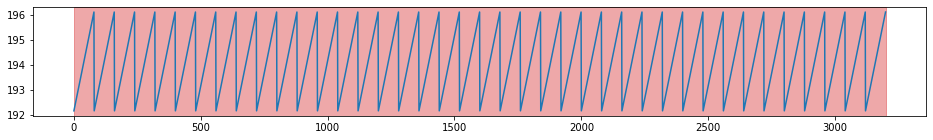

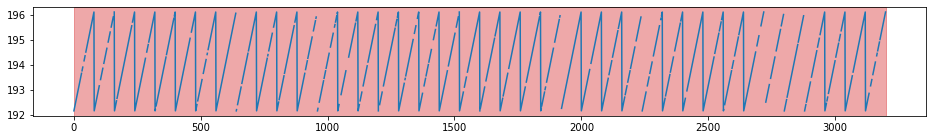

In [ ]:
x_aug1 = df_train['Channel frequency (THz)'].values
plot(x_aug1, x_aug1)

X_aug_cf5, Y_aug_cf5 = tsaug.Dropout(p=0.1, size=(1,5), fill=float("nan"), per_channel=True).augment(x_aug1, x_aug1)

plot(X_aug_cf5, Y_aug_cf5);

**tsaug.Pool**
Reduce the temporal resolution without changing the length.

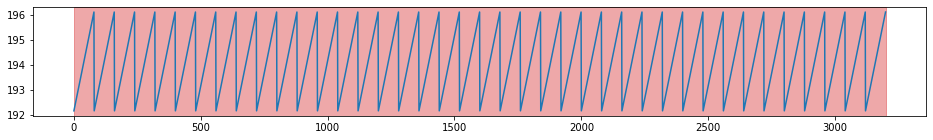

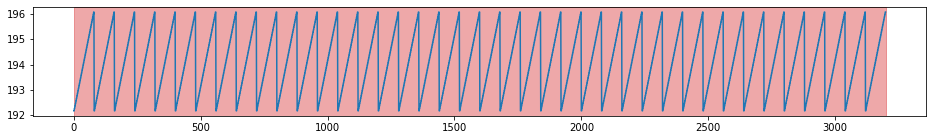

In [ ]:
x_aug1 = df_train['Channel frequency (THz)'].values
plot(x_aug1, x_aug1)

X_aug_cf6, Y_aug_cf6 = tsaug.Pool(size=2).augment(x_aug1, x_aug1)

plot(X_aug_cf6, Y_aug_cf6);

**tsaug.Quantize**
Quantize time series to a level set.

Values in a time series are rounded to the nearest level in the level set.

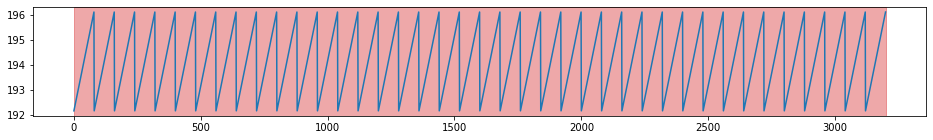

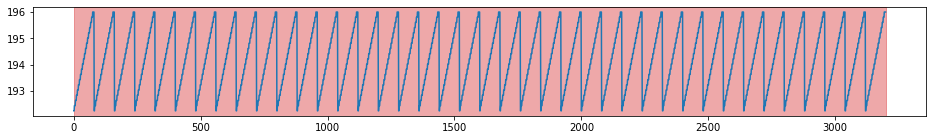

In [ ]:
x_aug1 = df_train['Channel frequency (THz)'].values
plot(x_aug1, x_aug1)

X_aug_cf7, Y_aug_cf7 = tsaug.Quantize(n_levels=20).augment(x_aug1, x_aug1)

plot(X_aug_cf7, Y_aug_cf7);

**tsaug.Resize**
Change the temporal resolution of time series.

The resized time series is obtained by linear interpolation of the original time series.

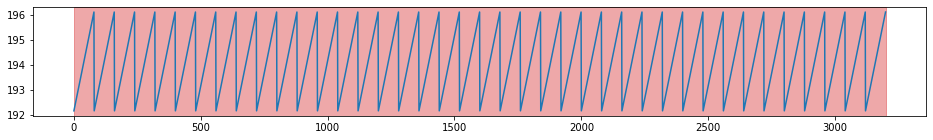

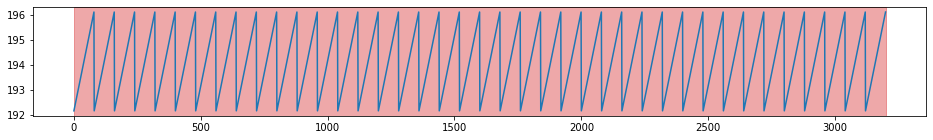

In [ ]:
x_aug1 = df_train['Channel frequency (THz)'].values
plot(x_aug1, x_aug1)

X_aug_cf8, Y_aug_cf8 = tsaug.Resize(size=3200).augment(x_aug1, x_aug1)

plot(X_aug_cf8, Y_aug_cf8);

**tsaug.Reverse**
Reverse the time line of series.

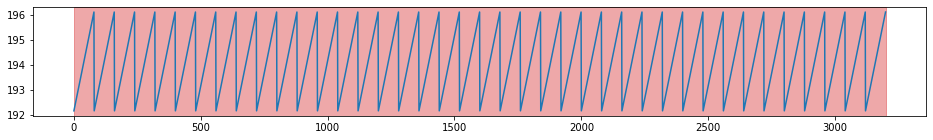

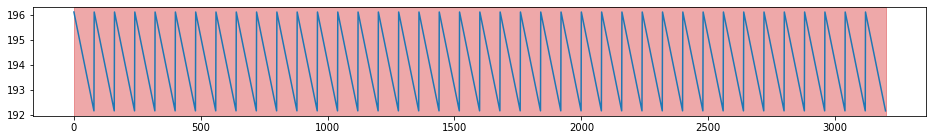

In [ ]:
x_aug1 = df_train['Channel frequency (THz)'].values
plot(x_aug1, x_aug1)

X_aug_cf9, Y_aug_cf9 = tsaug.Reverse().augment(x_aug1, x_aug1)

plot(X_aug_cf9, Y_aug_cf9);

**tsaug.TimeWarp**
Random time warping.

The augmenter random changed the speed of timeline. The time warping is controlled by the number of speed changes and the maximal ratio of max/min speed.

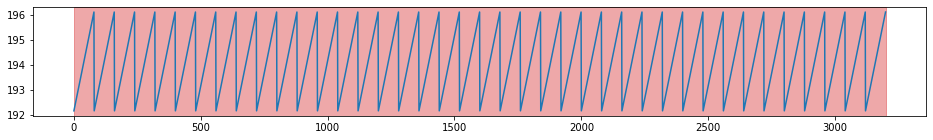

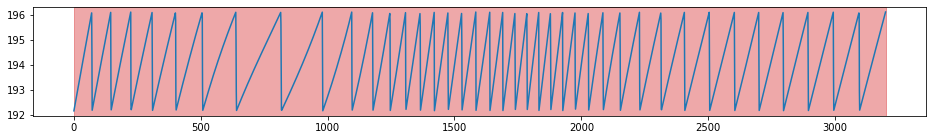

In [ ]:
x_aug1 = df_train['Channel frequency (THz)'].values
plot(x_aug1, x_aug1)

X_aug_cf10, Y_aug_cf10 = tsaug.TimeWarp(n_speed_change=5, max_speed_ratio=3).augment(x_aug1, x_aug1)

plot(X_aug_cf10, Y_aug_cf10);

**Add all Channel frequency data together**

In [ ]:
Channel_frequency = np.concatenate((x_aug1, X_aug_cf1, X_aug_cf2, X_aug_cf3, X_aug_cf4, X_aug_cf5, X_aug_cf6, X_aug_cf7, X_aug_cf8, X_aug_cf9, X_aug_cf10), axis=0)
Channel_frequency.shape

(35200,)

**Augmenting Channel power (dBm) data**

**Add Noise to the Channel power (dBm) data**

tsaug.AddNoise Add random noise to time series.

The noise added to every time point of a time series is independent and identically distributed

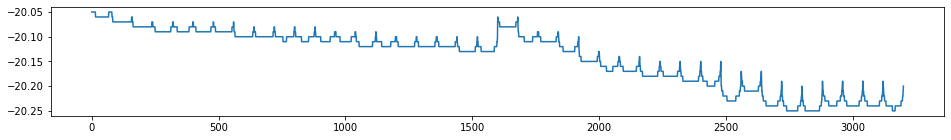

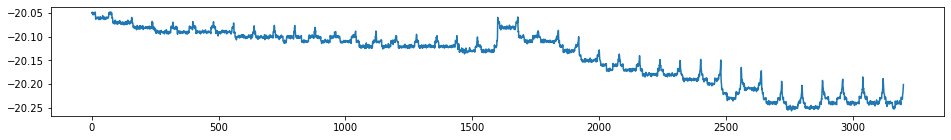

In [ ]:
x_aug1 = df_train['Channel power (dBm)'].values
plot(x_aug1, x_aug1)

import tsaug
X_aug_cf1, Y_aug_cf1 = tsaug.AddNoise(scale=0.01).augment(x_aug1, x_aug1)

plot(X_aug_cf1, Y_aug_cf1);

**tsaug.Convolve**
Convolve time series with a kernel window.

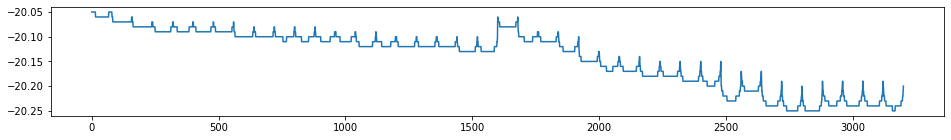

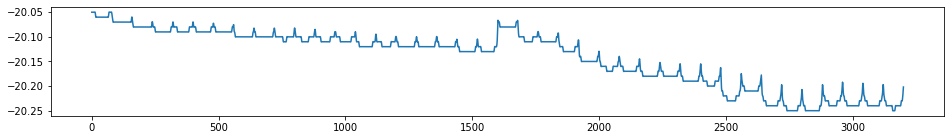

In [ ]:
x_aug1 = df_train['Channel power (dBm)'].values
plot(x_aug1, x_aug1)

X_aug_cf2, Y_aug_cf2 = tsaug.Convolve(window="flattop", size=11).augment(x_aug1, x_aug1)

plot(X_aug_cf2, Y_aug_cf2);

**tsaug.Crop**
Crop random sub-sequences from time series.

To guarantee all output series have the same length, if the crop size is not deterministic, all crops must be resize to a fixed length.

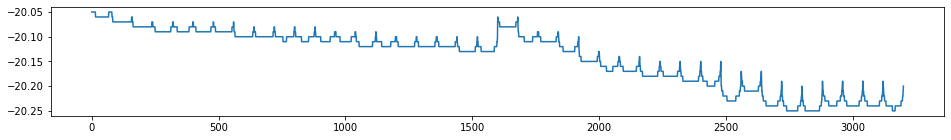

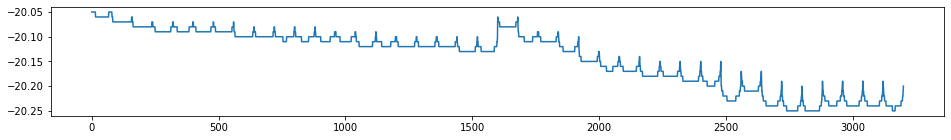

In [ ]:
x_aug1 = df_train['Channel power (dBm)'].values
plot(x_aug1, x_aug1)

X_aug_cf3, Y_aug_cf3 = tsaug.Crop(size=3200).augment(x_aug1, x_aug1)

plot(X_aug_cf3, Y_aug_cf3);

**tsaug.Drift**
Drift the value of time series.

The augmenter drifts the value of time series from its original values randomly and smoothly. The extent of drifting is controlled by the maximal drift and the number of drift points.

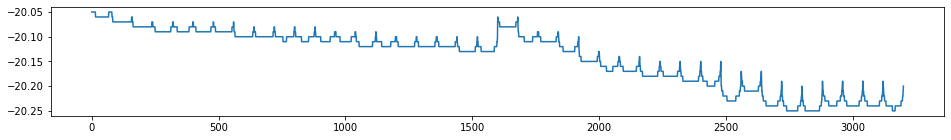

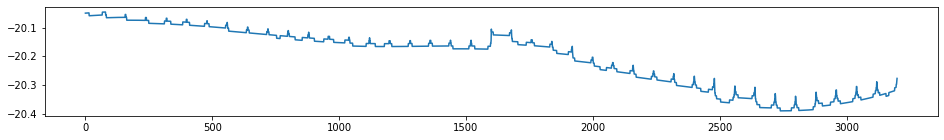

In [ ]:
x_aug1 = df_train['Channel power (dBm)'].values
plot(x_aug1, x_aug1)

X_aug_cf4, Y_aug_cf4 = tsaug.Drift(max_drift=0.7, n_drift_points=5).augment(x_aug1, x_aug1)

plot(X_aug_cf4, Y_aug_cf4);

**tsaug.Dropout**

Dropout values of some random time points in time series.

Single time points or sub-sequences could be dropped out.

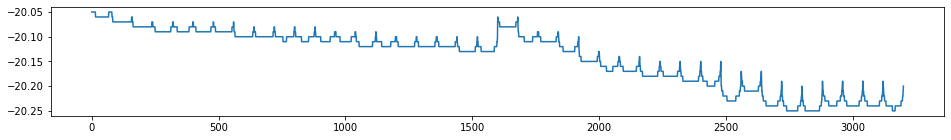

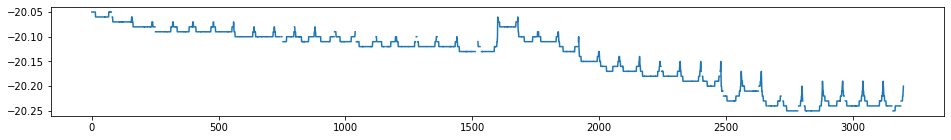

In [ ]:
x_aug1 = df_train['Channel power (dBm)'].values
plot(x_aug1, x_aug1)

X_aug_cf5, Y_aug_cf5 = tsaug.Dropout(p=0.1, size=(1,5), fill=float("nan"), per_channel=True).augment(x_aug1, x_aug1)

plot(X_aug_cf5, Y_aug_cf5);

**tsaug.Pool**
Reduce the temporal resolution without changing the length.

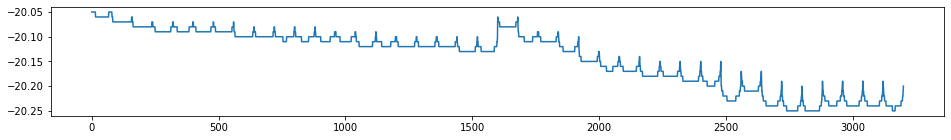

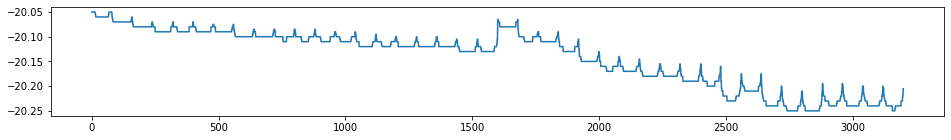

In [ ]:
x_aug1 = df_train['Channel power (dBm)'].values
plot(x_aug1, x_aug1)

X_aug_cf6, Y_aug_cf6 = tsaug.Pool(size=2).augment(x_aug1, x_aug1)

plot(X_aug_cf6, Y_aug_cf6);

**tsaug.Quantize**
Quantize time series to a level set.

Values in a time series are rounded to the nearest level in the level set.

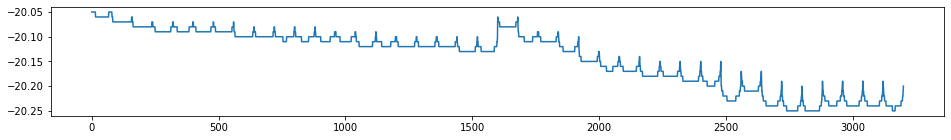

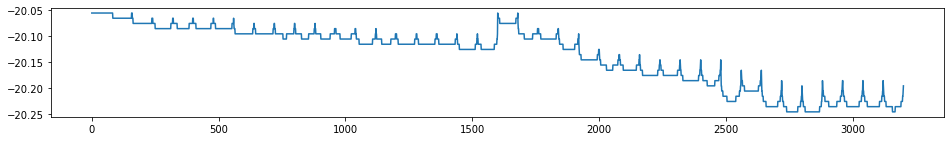

In [ ]:
x_aug1 = df_train['Channel power (dBm)'].values
plot(x_aug1, x_aug1)

X_aug_cf7, Y_aug_cf7 = tsaug.Quantize(n_levels=20).augment(x_aug1, x_aug1)

plot(X_aug_cf7, Y_aug_cf7);

**tsaug.Resize**
Change the temporal resolution of time series.

The resized time series is obtained by linear interpolation of the original time series.

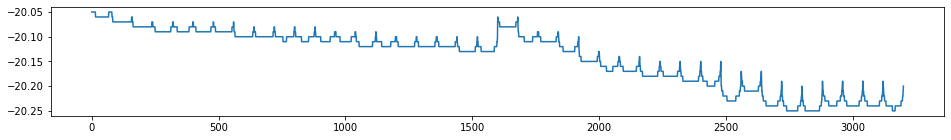

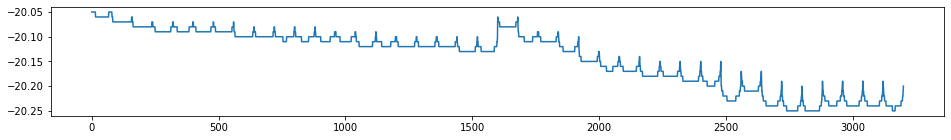

In [ ]:
x_aug1 = df_train['Channel power (dBm)'].values
plot(x_aug1, x_aug1)

X_aug_cf8, Y_aug_cf8 = tsaug.Resize(size=3200).augment(x_aug1, x_aug1)

plot(X_aug_cf8, Y_aug_cf8);

**tsaug.Reverse**
Reverse the time line of series.

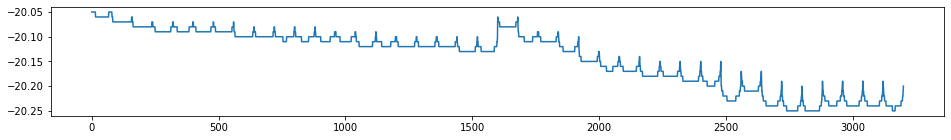

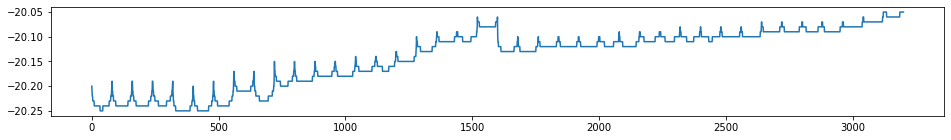

In [ ]:
x_aug1 = df_train['Channel power (dBm)'].values
plot(x_aug1, x_aug1)

X_aug_cf9, Y_aug_cf9 = tsaug.Reverse().augment(x_aug1, x_aug1)

plot(X_aug_cf9, Y_aug_cf9);

**tsaug.TimeWarp**
Random time warping.

The augmenter random changed the speed of timeline. The time warping is controlled by the number of speed changes and the maximal ratio of max/min speed.

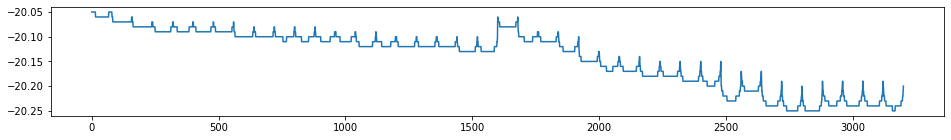

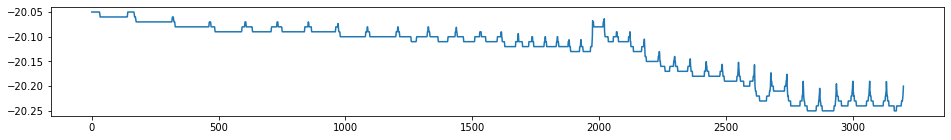

In [ ]:
x_aug1 = df_train['Channel power (dBm)'].values
plot(x_aug1, x_aug1)

X_aug_cf10, Y_aug_cf10 = tsaug.TimeWarp(n_speed_change=5, max_speed_ratio=3).augment(x_aug1, x_aug1)

plot(X_aug_cf10, Y_aug_cf10);

**Add all Channel power data together**

In [ ]:
Channel_power = np.concatenate((x_aug1, X_aug_cf1, X_aug_cf2, X_aug_cf3, X_aug_cf4, X_aug_cf5, X_aug_cf6, X_aug_cf7, X_aug_cf8, X_aug_cf9, X_aug_cf10), axis=0)
Channel_power.shape

(35200,)

**Augmenting OSNR ASE (signal bw, dB) data**

**Add Noise to the OSNR ASE data**

tsaug.AddNoise Add random noise to time series.

The noise added to every time point of a time series is independent and identically distributed

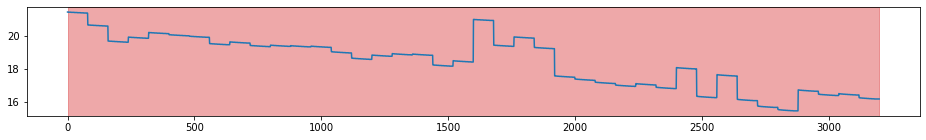

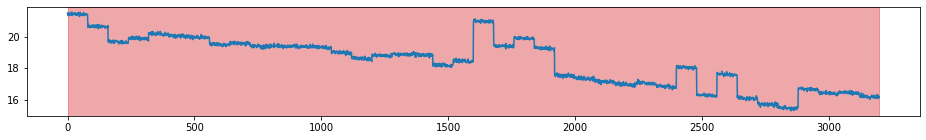

In [ ]:
x_aug1 = df_train['OSNR ASE (signal bw, dB)'].values
plot(x_aug1, x_aug1)

import tsaug
X_aug_cf1, Y_aug_cf1 = tsaug.AddNoise(scale=0.01).augment(x_aug1, x_aug1)

plot(X_aug_cf1, Y_aug_cf1);

**tsaug.Convolve**
Convolve time series with a kernel window.

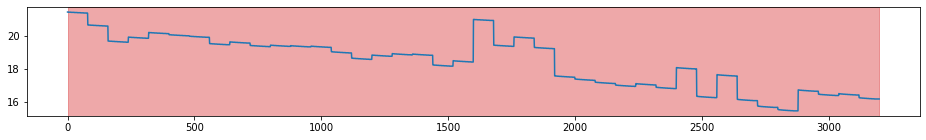

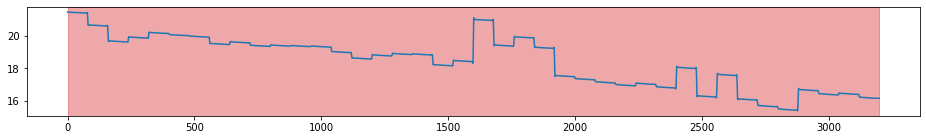

In [ ]:
x_aug1 = df_train['OSNR ASE (signal bw, dB)'].values
plot(x_aug1, x_aug1)

X_aug_cf2, Y_aug_cf2 = tsaug.Convolve(window="flattop", size=11).augment(x_aug1, x_aug1)

plot(X_aug_cf2, Y_aug_cf2);

**tsaug.Crop**
Crop random sub-sequences from time series.

To guarantee all output series have the same length, if the crop size is not deterministic, all crops must be resize to a fixed length.

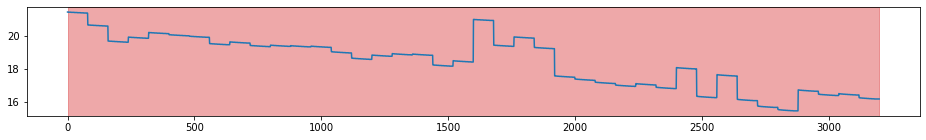

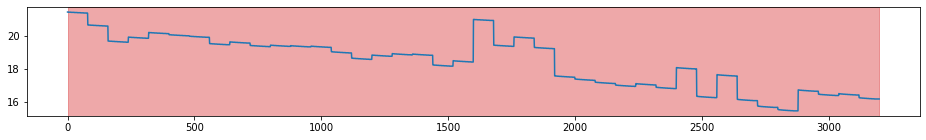

In [ ]:
x_aug1 = df_train['OSNR ASE (signal bw, dB)'].values
plot(x_aug1, x_aug1)

X_aug_cf3, Y_aug_cf3 = tsaug.Crop(size=3200).augment(x_aug1, x_aug1)

plot(X_aug_cf3, Y_aug_cf3);

**tsaug.Drift**
Drift the value of time series.

The augmenter drifts the value of time series from its original values randomly and smoothly. The extent of drifting is controlled by the maximal drift and the number of drift points.

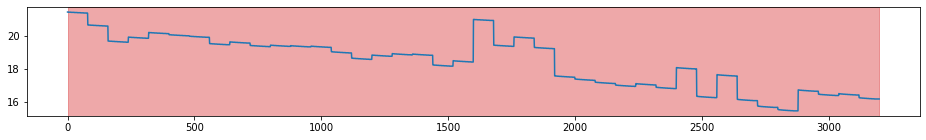

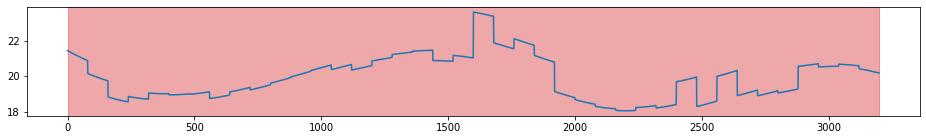

In [ ]:
x_aug1 = df_train['OSNR ASE (signal bw, dB)'].values
plot(x_aug1, x_aug1)

X_aug_cf4, Y_aug_cf4 = tsaug.Drift(max_drift=0.7, n_drift_points=5).augment(x_aug1, x_aug1)

plot(X_aug_cf4, Y_aug_cf4);

**tsaug.Dropout**

Dropout values of some random time points in time series.

Single time points or sub-sequences could be dropped out.

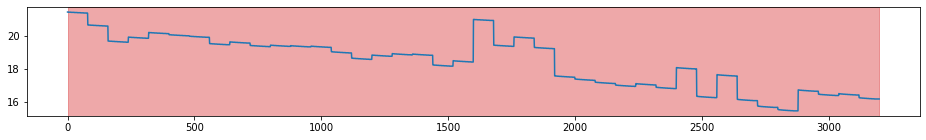

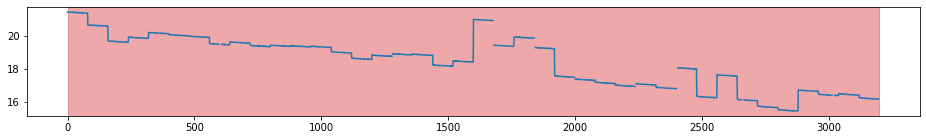

In [ ]:
x_aug1 = df_train['OSNR ASE (signal bw, dB)'].values
plot(x_aug1, x_aug1)

X_aug_cf5, Y_aug_cf5 = tsaug.Dropout(p=0.1, size=(1,5), fill=float("nan"), per_channel=True).augment(x_aug1, x_aug1)

plot(X_aug_cf5, Y_aug_cf5);

**tsaug.Pool**
Reduce the temporal resolution without changing the length.

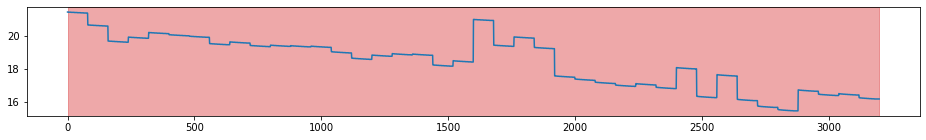

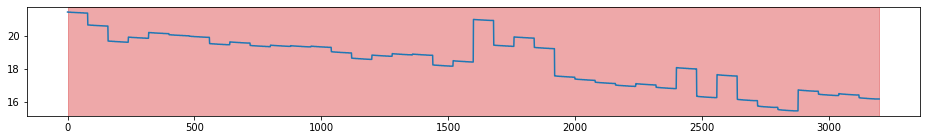

In [ ]:
x_aug1 = df_train['OSNR ASE (signal bw, dB)'].values
plot(x_aug1, x_aug1)

X_aug_cf6, Y_aug_cf6 = tsaug.Pool(size=2).augment(x_aug1, x_aug1)

plot(X_aug_cf6, Y_aug_cf6);

**tsaug.Quantize**
Quantize time series to a level set.

Values in a time series are rounded to the nearest level in the level set.

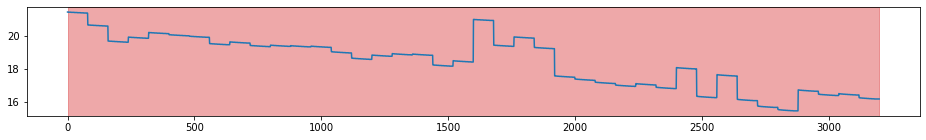

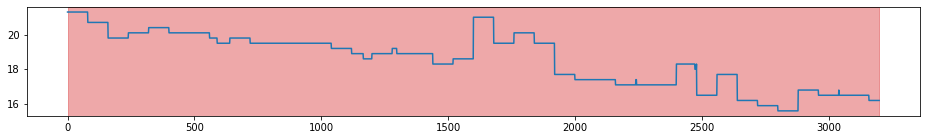

In [ ]:
x_aug1 = df_train['OSNR ASE (signal bw, dB)'].values
plot(x_aug1, x_aug1)

X_aug_cf7, Y_aug_cf7 = tsaug.Quantize(n_levels=20).augment(x_aug1, x_aug1)

plot(X_aug_cf7, Y_aug_cf7);

**tsaug.Resize**
Change the temporal resolution of time series.

The resized time series is obtained by linear interpolation of the original time series.

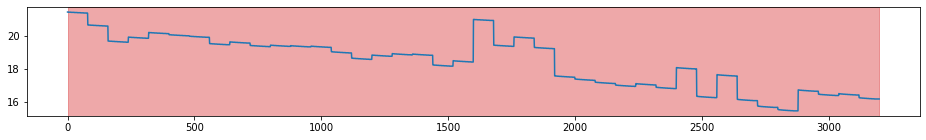

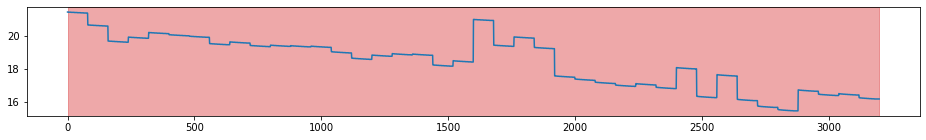

In [ ]:
x_aug1 = df_train['OSNR ASE (signal bw, dB)'].values
plot(x_aug1, x_aug1)

X_aug_cf8, Y_aug_cf8 = tsaug.Resize(size=3200).augment(x_aug1, x_aug1)

plot(X_aug_cf8, Y_aug_cf8);

**tsaug.Reverse**
Reverse the time line of series.

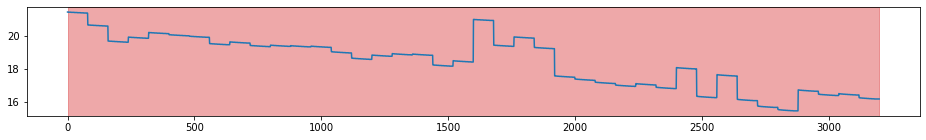

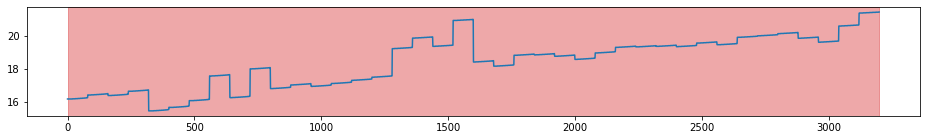

In [ ]:
x_aug1 = df_train['OSNR ASE (signal bw, dB)'].values
plot(x_aug1, x_aug1)

X_aug_cf9, Y_aug_cf9 = tsaug.Reverse().augment(x_aug1, x_aug1)

plot(X_aug_cf9, Y_aug_cf9);

**tsaug.TimeWarp**
Random time warping.

The augmenter random changed the speed of timeline. The time warping is controlled by the number of speed changes and the maximal ratio of max/min speed.

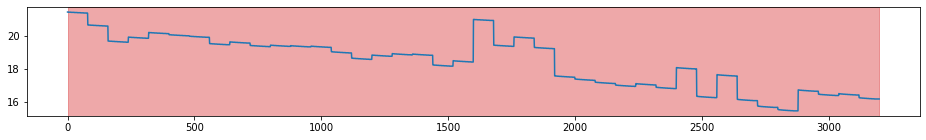

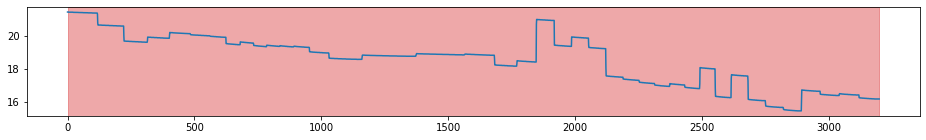

In [ ]:
x_aug1 = df_train['OSNR ASE (signal bw, dB)'].values
plot(x_aug1, x_aug1)

X_aug_cf10, Y_aug_cf10 = tsaug.TimeWarp(n_speed_change=5, max_speed_ratio=3).augment(x_aug1, x_aug1)

plot(X_aug_cf10, Y_aug_cf10);

**Add all Channel frequency data together**

In [ ]:
OSNR_ASE = np.concatenate((x_aug1, X_aug_cf1, X_aug_cf2, X_aug_cf3, X_aug_cf4, X_aug_cf5, X_aug_cf6, X_aug_cf7, X_aug_cf8, X_aug_cf9, X_aug_cf10), axis=0)
OSNR_ASE.shape

(35200,)

**Augmenting SNR NLI (signal bw, dB) data**

**Add Noise to the SNR NLI (signal bw, dB) data**

tsaug.AddNoise Add random noise to time series.

The noise added to every time point of a time series is independent and identically distributed

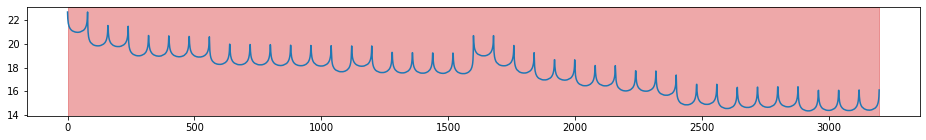

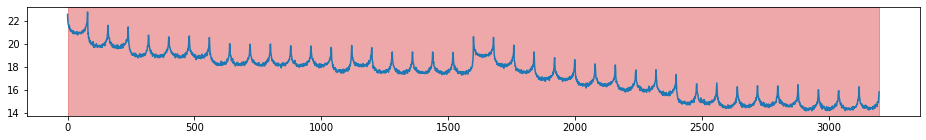

In [ ]:
x_aug1 = df_train['SNR NLI (signal bw, dB)'].values
plot(x_aug1, x_aug1)

import tsaug
X_aug_cf1, Y_aug_cf1 = tsaug.AddNoise(scale=0.01).augment(x_aug1, x_aug1)

plot(X_aug_cf1, Y_aug_cf1);

**tsaug.Convolve**
Convolve time series with a kernel window.

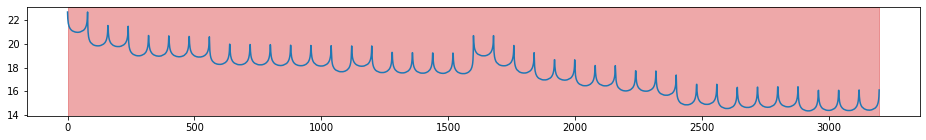

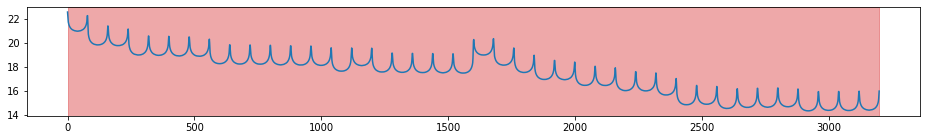

In [ ]:
x_aug1 = df_train['SNR NLI (signal bw, dB)'].values
plot(x_aug1, x_aug1)

X_aug_cf2, Y_aug_cf2 = tsaug.Convolve(window="flattop", size=11).augment(x_aug1, x_aug1)

plot(X_aug_cf2, Y_aug_cf2);

**tsaug.Crop**
Crop random sub-sequences from time series.

To guarantee all output series have the same length, if the crop size is not deterministic, all crops must be resize to a fixed length.

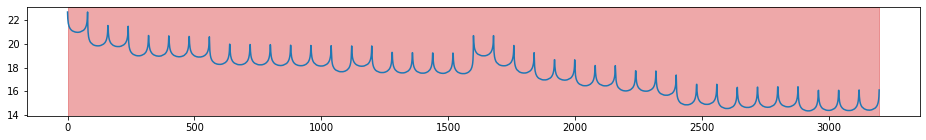

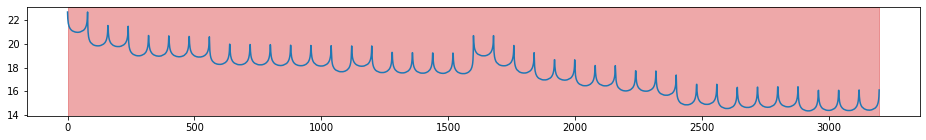

In [ ]:
x_aug1 = df_train['SNR NLI (signal bw, dB)'].values
plot(x_aug1, x_aug1)

X_aug_cf3, Y_aug_cf3 = tsaug.Crop(size=3200).augment(x_aug1, x_aug1)

plot(X_aug_cf3, Y_aug_cf3);

**tsaug.Drift**
Drift the value of time series.

The augmenter drifts the value of time series from its original values randomly and smoothly. The extent of drifting is controlled by the maximal drift and the number of drift points.

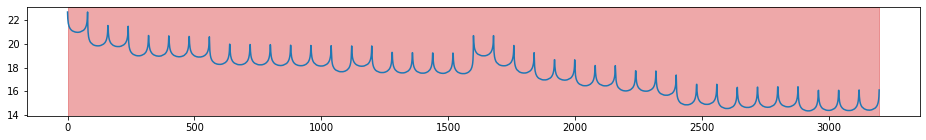

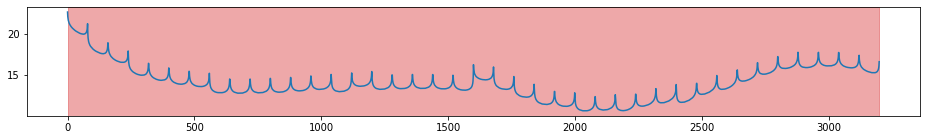

In [ ]:
x_aug1 = df_train['SNR NLI (signal bw, dB)'].values
plot(x_aug1, x_aug1)

X_aug_cf4, Y_aug_cf4 = tsaug.Drift(max_drift=0.7, n_drift_points=5).augment(x_aug1, x_aug1)

plot(X_aug_cf4, Y_aug_cf4);

**tsaug.Dropout**

Dropout values of some random time points in time series.

Single time points or sub-sequences could be dropped out.

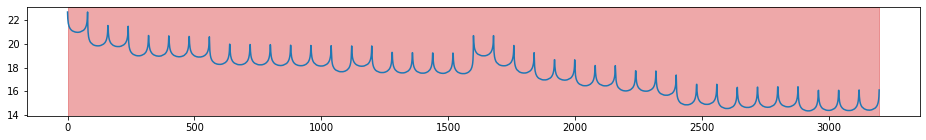

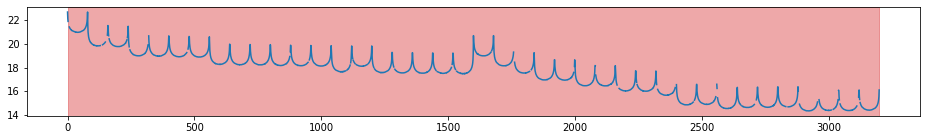

In [ ]:
x_aug1 = df_train['SNR NLI (signal bw, dB)'].values
plot(x_aug1, x_aug1)

X_aug_cf5, Y_aug_cf5 = tsaug.Dropout(p=0.1, size=(1,5), fill=float("nan"), per_channel=True).augment(x_aug1, x_aug1)

plot(X_aug_cf5, Y_aug_cf5);

**tsaug.Pool**
Reduce the temporal resolution without changing the length.

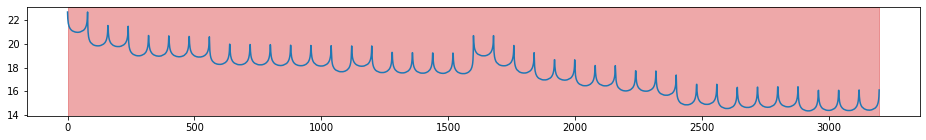

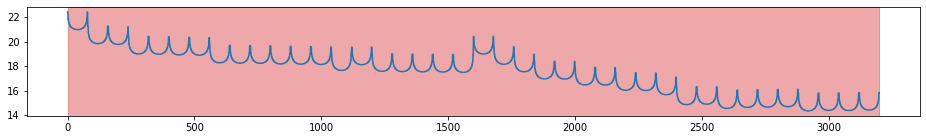

In [ ]:
x_aug1 = df_train['SNR NLI (signal bw, dB)'].values
plot(x_aug1, x_aug1)

X_aug_cf6, Y_aug_cf6 = tsaug.Pool(size=2).augment(x_aug1, x_aug1)

plot(X_aug_cf6, Y_aug_cf6);

**tsaug.Quantize**
Quantize time series to a level set.

Values in a time series are rounded to the nearest level in the level set.

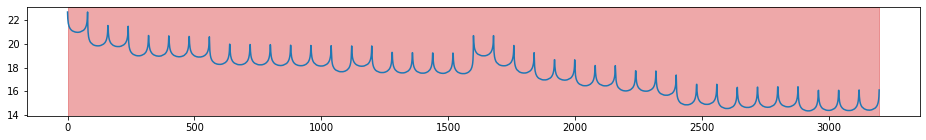

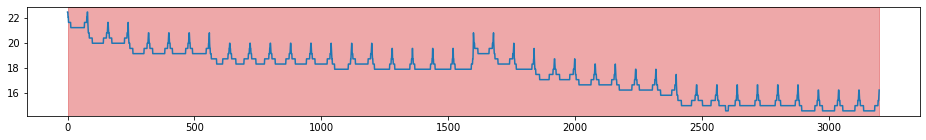

In [ ]:
x_aug1 = df_train['SNR NLI (signal bw, dB)'].values
plot(x_aug1, x_aug1)

X_aug_cf7, Y_aug_cf7 = tsaug.Quantize(n_levels=20).augment(x_aug1, x_aug1)

plot(X_aug_cf7, Y_aug_cf7);

**tsaug.Resize**
Change the temporal resolution of time series.

The resized time series is obtained by linear interpolation of the original time series.

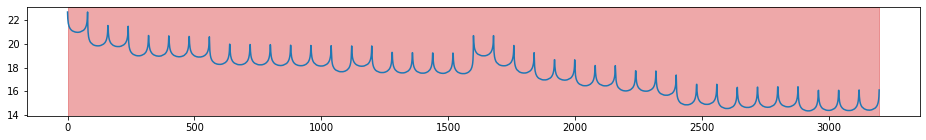

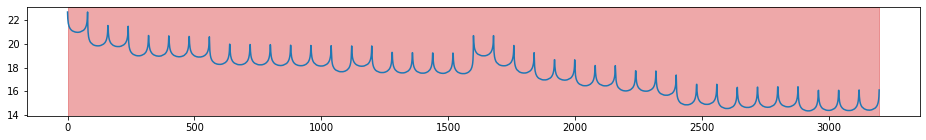

In [ ]:
x_aug1 = df_train['SNR NLI (signal bw, dB)'].values
plot(x_aug1, x_aug1)

X_aug_cf8, Y_aug_cf8 = tsaug.Resize(size=3200).augment(x_aug1, x_aug1)

plot(X_aug_cf8, Y_aug_cf8);

**tsaug.Reverse**
Reverse the time line of series.

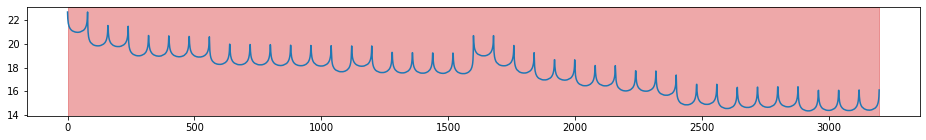

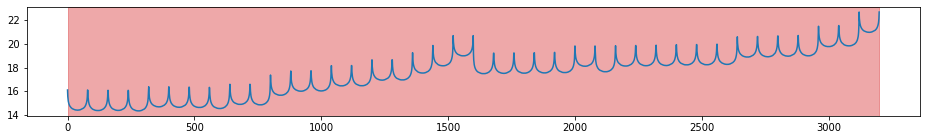

In [ ]:
x_aug1 = df_train['SNR NLI (signal bw, dB)'].values
plot(x_aug1, x_aug1)

X_aug_cf9, Y_aug_cf9 = tsaug.Reverse().augment(x_aug1, x_aug1)

plot(X_aug_cf9, Y_aug_cf9);

**tsaug.TimeWarp**
Random time warping.

The augmenter random changed the speed of timeline. The time warping is controlled by the number of speed changes and the maximal ratio of max/min speed.

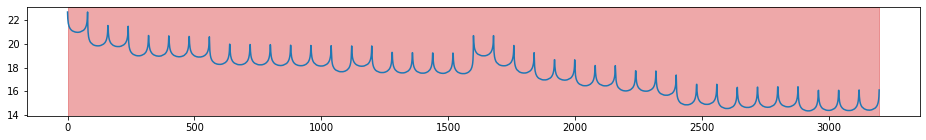

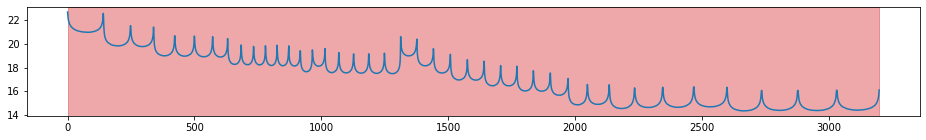

In [ ]:
x_aug1 = df_train['SNR NLI (signal bw, dB)'].values
plot(x_aug1, x_aug1)

X_aug_cf10, Y_aug_cf10 = tsaug.TimeWarp(n_speed_change=5, max_speed_ratio=3).augment(x_aug1, x_aug1)

plot(X_aug_cf10, Y_aug_cf10);

**Add all Channel frequency data together**

In [ ]:
SNR_NLI = np.concatenate((x_aug1, X_aug_cf1, X_aug_cf2, X_aug_cf3, X_aug_cf4, X_aug_cf5, X_aug_cf6, X_aug_cf7, X_aug_cf8, X_aug_cf9, X_aug_cf10), axis=0)
SNR_NLI.shape

(35200,)

**Augmenting Span data**

**Add Noise to the Span data**

tsaug.AddNoise Add random noise to time series.

The noise added to every time point of a time series is independent and identically distributed

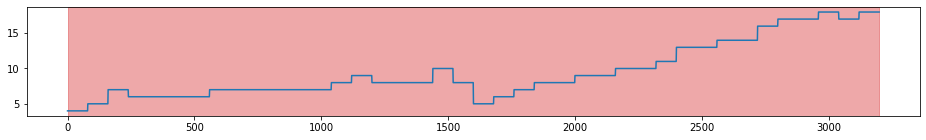

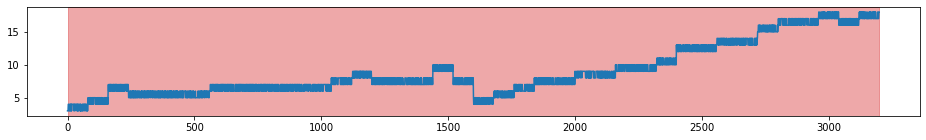

In [ ]:
x_aug1 = df_train['Span'].values
plot(x_aug1, x_aug1)

import tsaug
X_aug_cf1, Y_aug_cf1 = tsaug.AddNoise(scale=0.01).augment(x_aug1, x_aug1)

plot(X_aug_cf1, Y_aug_cf1);

**tsaug.Convolve**
Convolve time series with a kernel window.

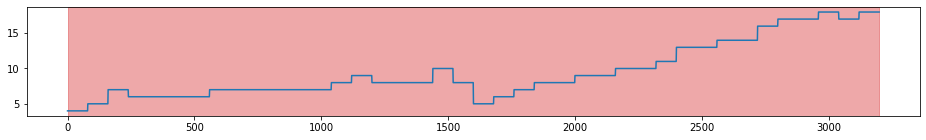

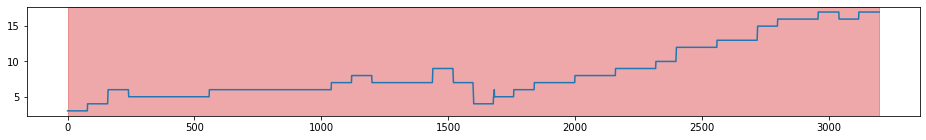

In [ ]:
x_aug1 = df_train['Span'].values
plot(x_aug1, x_aug1)

X_aug_cf2, Y_aug_cf2 = tsaug.Convolve(window="flattop", size=11).augment(x_aug1, x_aug1)

plot(X_aug_cf2, Y_aug_cf2);

**tsaug.Crop**
Crop random sub-sequences from time series.

To guarantee all output series have the same length, if the crop size is not deterministic, all crops must be resize to a fixed length.

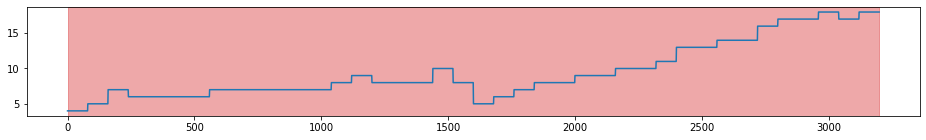

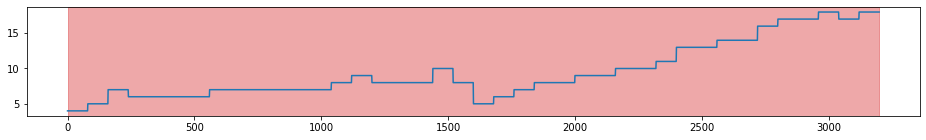

In [ ]:
x_aug1 = df_train['Span'].values
plot(x_aug1, x_aug1)

X_aug_cf3, Y_aug_cf3 = tsaug.Crop(size=3200).augment(x_aug1, x_aug1)

plot(X_aug_cf3, Y_aug_cf3);

**tsaug.Drift**
Drift the value of time series.

The augmenter drifts the value of time series from its original values randomly and smoothly. The extent of drifting is controlled by the maximal drift and the number of drift points.

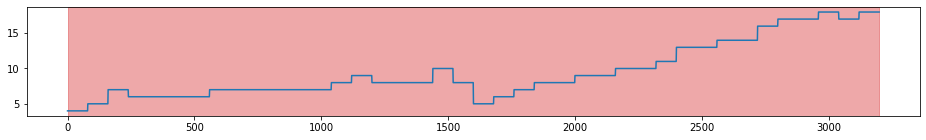

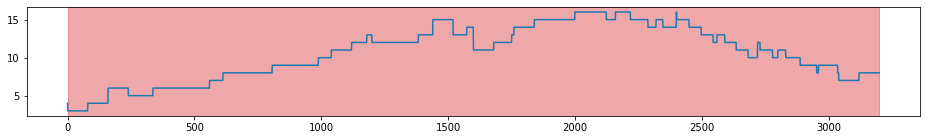

In [ ]:
x_aug1 = df_train['Span'].values
plot(x_aug1, x_aug1)

X_aug_cf4, Y_aug_cf4 = tsaug.Drift(max_drift=0.7, n_drift_points=5).augment(x_aug1, x_aug1)

plot(X_aug_cf4, Y_aug_cf4);

**tsaug.Dropout**

Dropout values of some random time points in time series.

Single time points or sub-sequences could be dropped out.

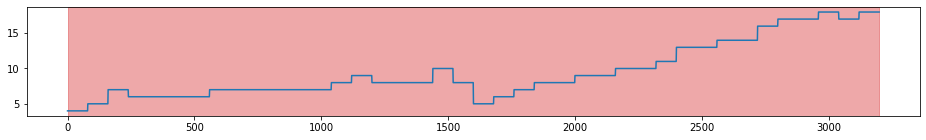

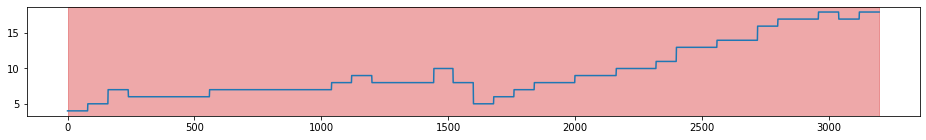

In [ ]:
x_aug1 = df_train['Span'].values
plot(x_aug1, x_aug1)

X_aug_cf5, Y_aug_cf5 = tsaug.Dropout(p=0.1, size=(1,5), per_channel=True).augment(x_aug1, x_aug1)

plot(X_aug_cf5, Y_aug_cf5);

**tsaug.Pool**
Reduce the temporal resolution without changing the length.

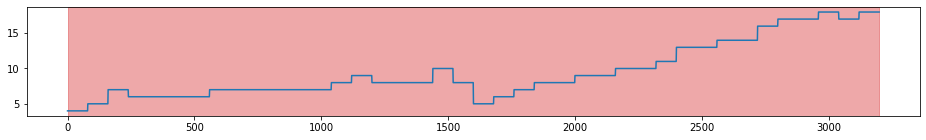

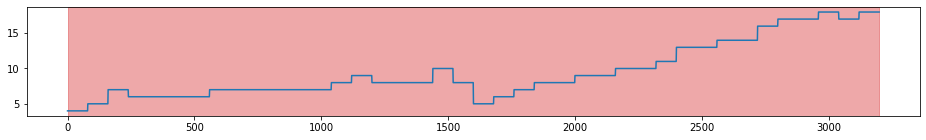

In [ ]:
x_aug1 = df_train['Span'].values
plot(x_aug1, x_aug1)

X_aug_cf6, Y_aug_cf6 = tsaug.Pool(size=2).augment(x_aug1, x_aug1)

plot(X_aug_cf6, Y_aug_cf6);

**tsaug.Quantize**
Quantize time series to a level set.

Values in a time series are rounded to the nearest level in the level set.

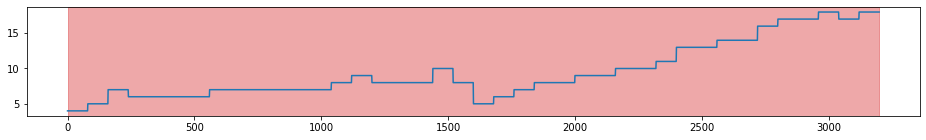

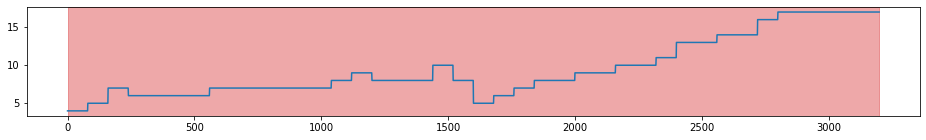

In [ ]:
x_aug1 = df_train['Span'].values
plot(x_aug1, x_aug1)

X_aug_cf7, Y_aug_cf7 = tsaug.Quantize(n_levels=20).augment(x_aug1, x_aug1)

plot(X_aug_cf7, Y_aug_cf7);

**tsaug.Resize**
Change the temporal resolution of time series.

The resized time series is obtained by linear interpolation of the original time series.

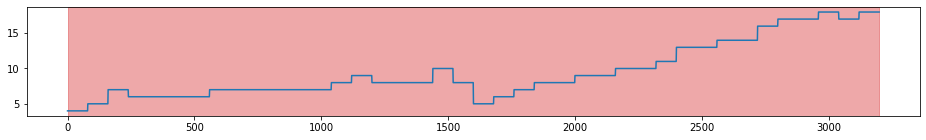

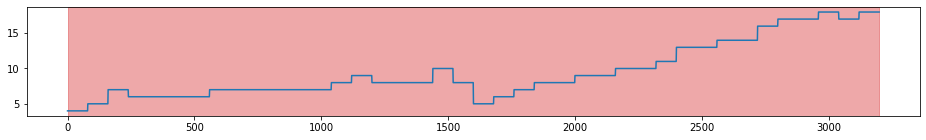

In [ ]:
x_aug1 = df_train['Span'].values
plot(x_aug1, x_aug1)

X_aug_cf8, Y_aug_cf8 = tsaug.Resize(size=3200).augment(x_aug1, x_aug1)

plot(X_aug_cf8, Y_aug_cf8);

**tsaug.Reverse**
Reverse the time line of series.

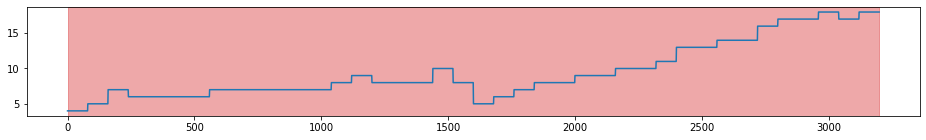

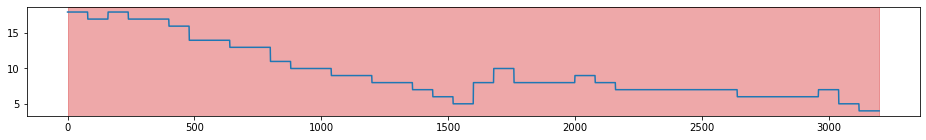

In [ ]:
x_aug1 = df_train['Span'].values
plot(x_aug1, x_aug1)

X_aug_cf9, Y_aug_cf9 = tsaug.Reverse().augment(x_aug1, x_aug1)

plot(X_aug_cf9, Y_aug_cf9);

**tsaug.TimeWarp**
Random time warping.

The augmenter random changed the speed of timeline. The time warping is controlled by the number of speed changes and the maximal ratio of max/min speed.

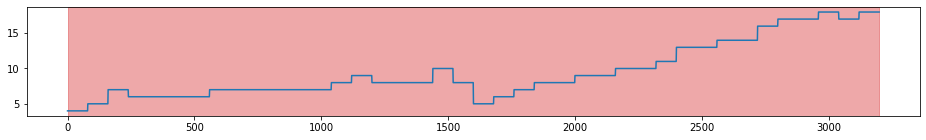

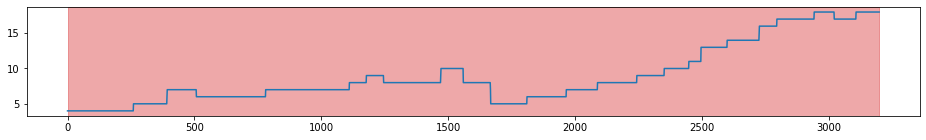

In [ ]:
x_aug1 = df_train['Span'].values
plot(x_aug1, x_aug1)

X_aug_cf10, Y_aug_cf10 = tsaug.TimeWarp(n_speed_change=5, max_speed_ratio=3).augment(x_aug1, x_aug1)

plot(X_aug_cf10, Y_aug_cf10);

**Add all Channel frequency data together**

In [ ]:
Span = np.concatenate((x_aug1, X_aug_cf1, X_aug_cf2, X_aug_cf3, X_aug_cf4, X_aug_cf5, X_aug_cf6, X_aug_cf7, X_aug_cf8, X_aug_cf9, X_aug_cf10), axis=0)
Span.shape

(35200,)

**Augmenting Distance (km) data**

**Add Noise to the Distance (km) data**

tsaug.AddNoise Add random noise to time series.

The noise added to every time point of a time series is independent and identically distributed

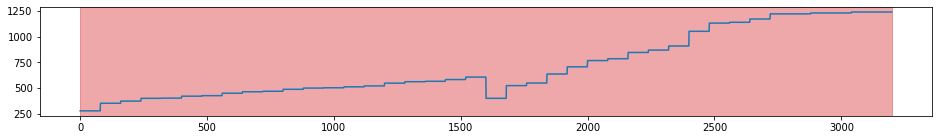

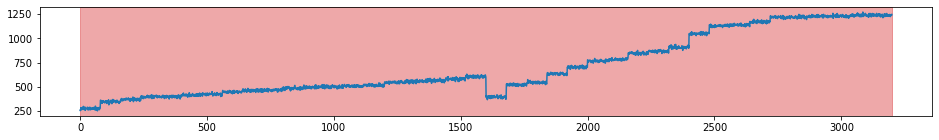

In [ ]:
x_aug1 = df_train['Distance (km)'].values
plot(x_aug1, x_aug1)

import tsaug
X_aug_cf1, Y_aug_cf1 = tsaug.AddNoise(scale=0.01).augment(x_aug1, x_aug1)

plot(X_aug_cf1, Y_aug_cf1);

**tsaug.Convolve**
Convolve time series with a kernel window.

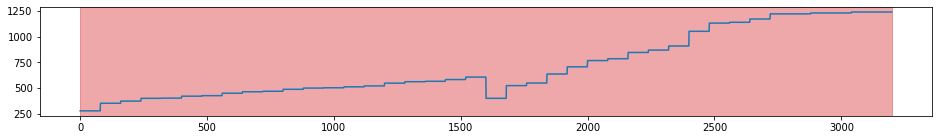

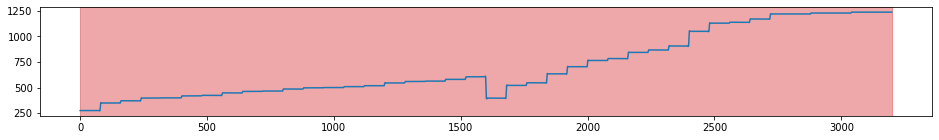

In [ ]:
x_aug1 = df_train['Distance (km)'].values
plot(x_aug1, x_aug1)

X_aug_cf2, Y_aug_cf2 = tsaug.Convolve(window="flattop", size=11).augment(x_aug1, x_aug1)

plot(X_aug_cf2, Y_aug_cf2);

**tsaug.Crop**
Crop random sub-sequences from time series.

To guarantee all output series have the same length, if the crop size is not deterministic, all crops must be resize to a fixed length.

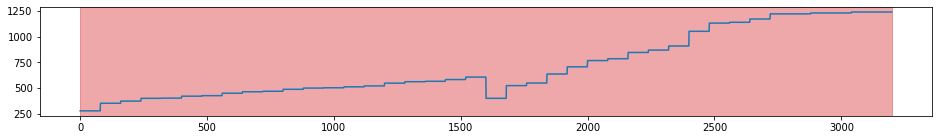

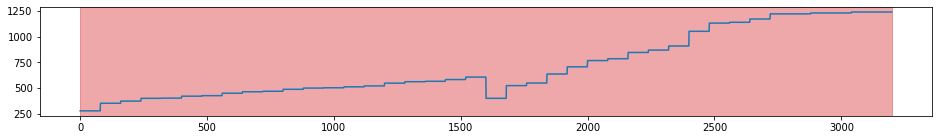

In [ ]:
x_aug1 = df_train['Distance (km)'].values
plot(x_aug1, x_aug1)

X_aug_cf3, Y_aug_cf3 = tsaug.Crop(size=3200).augment(x_aug1, x_aug1)

plot(X_aug_cf3, Y_aug_cf3);

**tsaug.Drift**
Drift the value of time series.

The augmenter drifts the value of time series from its original values randomly and smoothly. The extent of drifting is controlled by the maximal drift and the number of drift points.

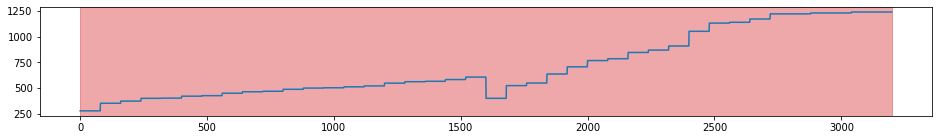

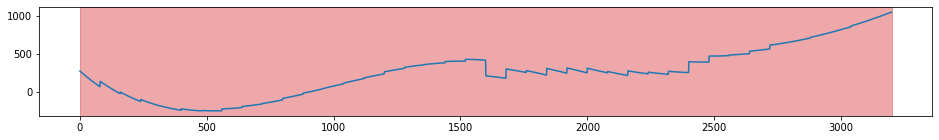

In [ ]:
x_aug1 = df_train['Distance (km)'].values
plot(x_aug1, x_aug1)

X_aug_cf4, Y_aug_cf4 = tsaug.Drift(max_drift=0.7, n_drift_points=5).augment(x_aug1, x_aug1)

plot(X_aug_cf4, Y_aug_cf4);

**tsaug.Dropout**

Dropout values of some random time points in time series.

Single time points or sub-sequences could be dropped out.

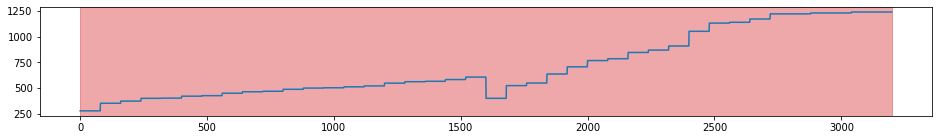

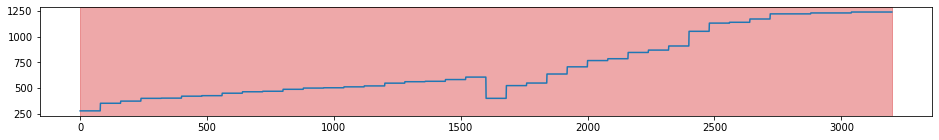

In [ ]:
x_aug1 = df_train['Distance (km)'].values
plot(x_aug1, x_aug1)

X_aug_cf5, Y_aug_cf5 = tsaug.Dropout(p=0.1, size=(1,5), per_channel=True).augment(x_aug1, x_aug1)

plot(X_aug_cf5, Y_aug_cf5);

**tsaug.Pool**
Reduce the temporal resolution without changing the length.

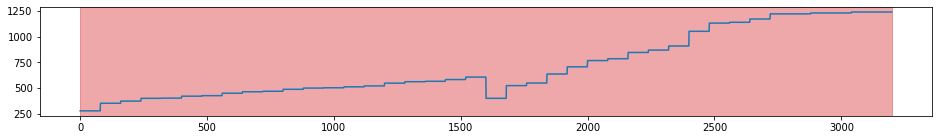

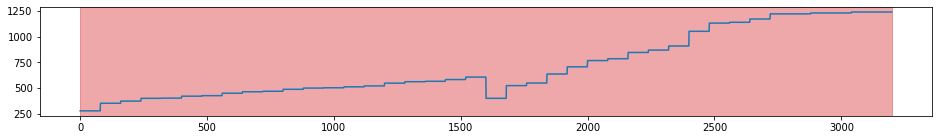

In [ ]:
x_aug1 = df_train['Distance (km)'].values
plot(x_aug1, x_aug1)

X_aug_cf6, Y_aug_cf6 = tsaug.Pool(size=2).augment(x_aug1, x_aug1)

plot(X_aug_cf6, Y_aug_cf6);

**tsaug.Quantize**
Quantize time series to a level set.

Values in a time series are rounded to the nearest level in the level set.

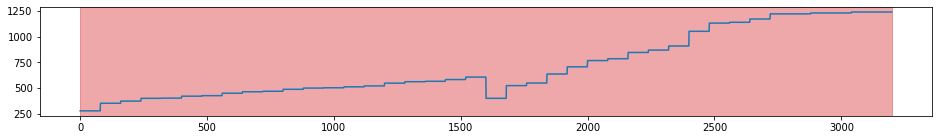

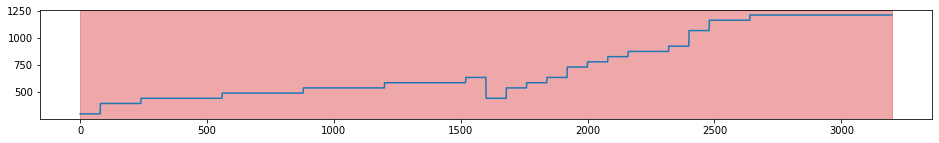

In [ ]:
x_aug1 = df_train['Distance (km)'].values
plot(x_aug1, x_aug1)

X_aug_cf7, Y_aug_cf7 = tsaug.Quantize(n_levels=20).augment(x_aug1, x_aug1)

plot(X_aug_cf7, Y_aug_cf7);

**tsaug.Resize**
Change the temporal resolution of time series.

The resized time series is obtained by linear interpolation of the original time series.

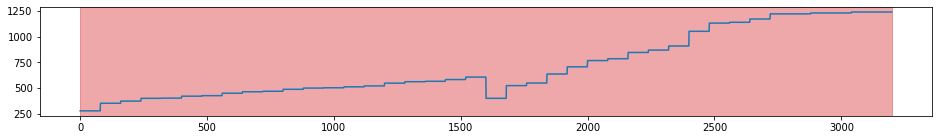

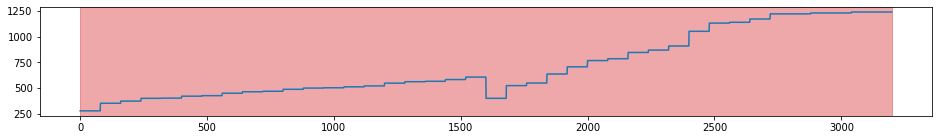

In [ ]:
x_aug1 = df_train['Distance (km)'].values
plot(x_aug1, x_aug1)

X_aug_cf8, Y_aug_cf8 = tsaug.Resize(size=3200).augment(x_aug1, x_aug1)

plot(X_aug_cf8, Y_aug_cf8);

**tsaug.Reverse**
Reverse the time line of series.

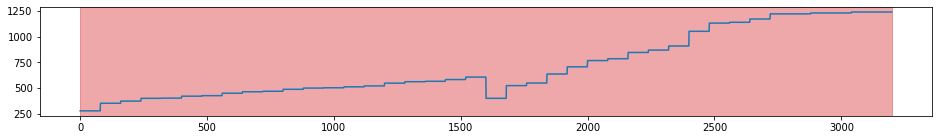

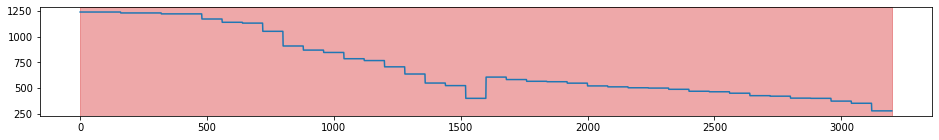

In [ ]:
x_aug1 = df_train['Distance (km)'].values
plot(x_aug1, x_aug1)

X_aug_cf9, Y_aug_cf9 = tsaug.Reverse().augment(x_aug1, x_aug1)

plot(X_aug_cf9, Y_aug_cf9);

**tsaug.TimeWarp**
Random time warping.

The augmenter random changed the speed of timeline. The time warping is controlled by the number of speed changes and the maximal ratio of max/min speed.

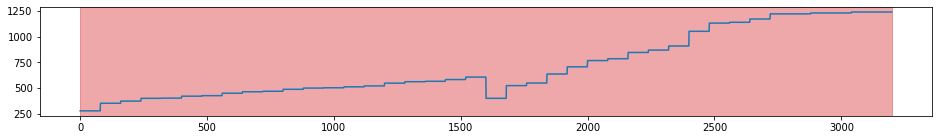

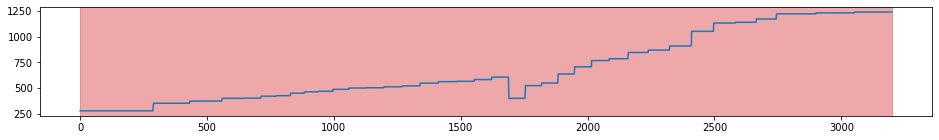

In [ ]:
x_aug1 = df_train['Distance (km)'].values
plot(x_aug1, x_aug1)

X_aug_cf10, Y_aug_cf10 = tsaug.TimeWarp(n_speed_change=5, max_speed_ratio=3).augment(x_aug1, x_aug1)

plot(X_aug_cf10, Y_aug_cf10);

**Add all Channel frequency data together**

In [ ]:
Distance = np.concatenate((x_aug1, X_aug_cf1, X_aug_cf2, X_aug_cf3, X_aug_cf4, X_aug_cf5, X_aug_cf6, X_aug_cf7, X_aug_cf8, X_aug_cf9, X_aug_cf10), axis=0)
Distance.shape

(35200,)

**Augmenting SNR total (signal bw, dB) data**

**Add Noise to the SNR total (signal bw, dB) data**

tsaug.AddNoise Add random noise to time series.

The noise added to every time point of a time series is independent and identically distributed

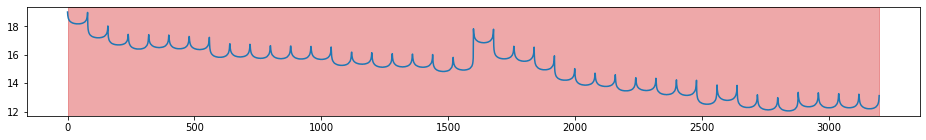

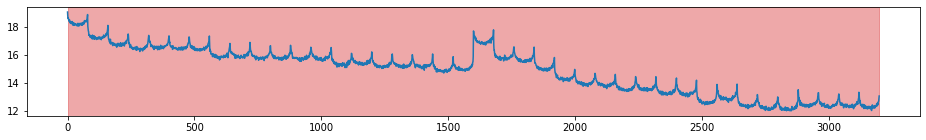

In [ ]:
x_aug1 = df_train['SNR total (signal bw, dB)'].values
plot(x_aug1, x_aug1)

import tsaug
X_aug_cf1, Y_aug_cf1 = tsaug.AddNoise(scale=0.01).augment(x_aug1, x_aug1)

plot(X_aug_cf1, Y_aug_cf1);

**tsaug.Convolve**
Convolve time series with a kernel window.

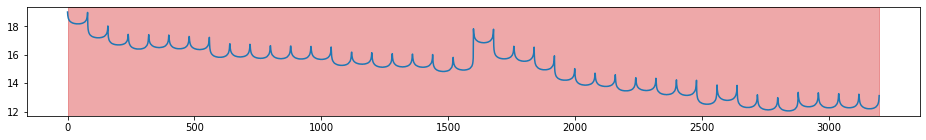

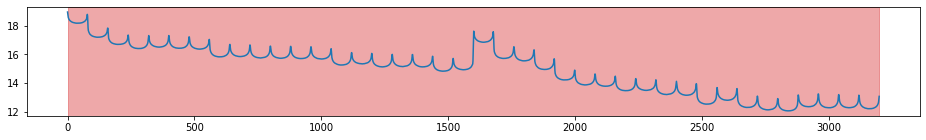

In [ ]:
x_aug1 = df_train['SNR total (signal bw, dB)'].values
plot(x_aug1, x_aug1)

X_aug_cf2, Y_aug_cf2 = tsaug.Convolve(window="flattop", size=11).augment(x_aug1, x_aug1)

plot(X_aug_cf2, Y_aug_cf2);

**tsaug.Crop**
Crop random sub-sequences from time series.

To guarantee all output series have the same length, if the crop size is not deterministic, all crops must be resize to a fixed length.

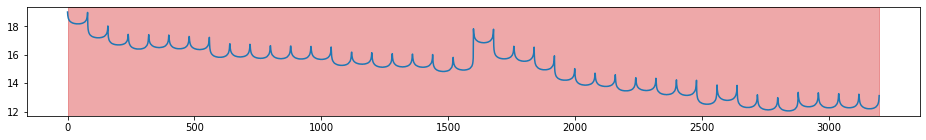

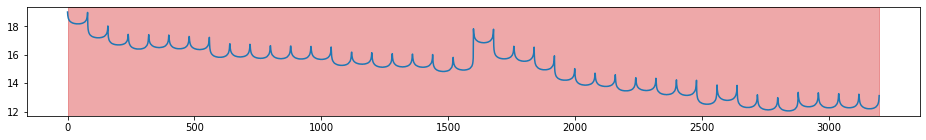

In [ ]:
x_aug1 = df_train['SNR total (signal bw, dB)'].values
plot(x_aug1, x_aug1)

X_aug_cf3, Y_aug_cf3 = tsaug.Crop(size=3200).augment(x_aug1, x_aug1)

plot(X_aug_cf3, Y_aug_cf3);

**tsaug.Drift**
Drift the value of time series.

The augmenter drifts the value of time series from its original values randomly and smoothly. The extent of drifting is controlled by the maximal drift and the number of drift points.

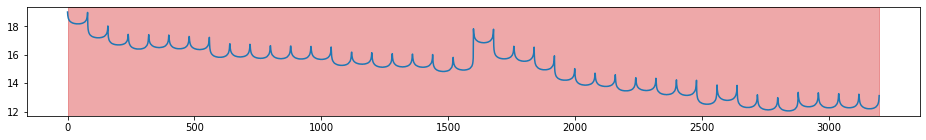

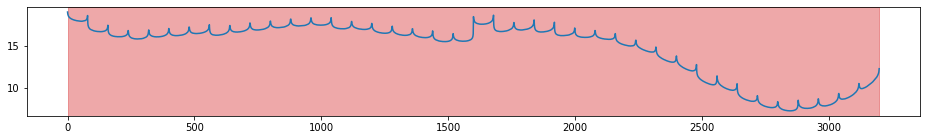

In [ ]:
x_aug1 = df_train['SNR total (signal bw, dB)'].values
plot(x_aug1, x_aug1)

X_aug_cf4, Y_aug_cf4 = tsaug.Drift(max_drift=0.7, n_drift_points=5).augment(x_aug1, x_aug1)

plot(X_aug_cf4, Y_aug_cf4);

**tsaug.Dropout**

Dropout values of some random time points in time series.

Single time points or sub-sequences could be dropped out.

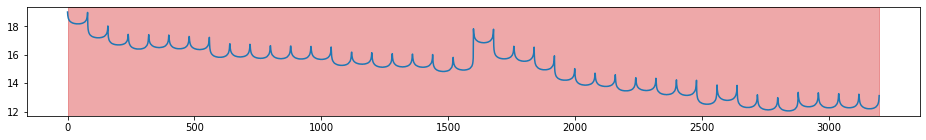

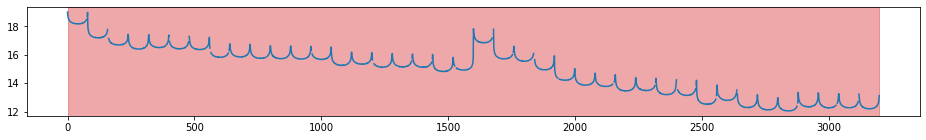

In [ ]:
x_aug1 = df_train['SNR total (signal bw, dB)'].values
plot(x_aug1, x_aug1)

X_aug_cf5, Y_aug_cf5 = tsaug.Dropout(p=0.1, size=(1,5), fill=float("nan"), per_channel=True).augment(x_aug1, x_aug1)

plot(X_aug_cf5, Y_aug_cf5);

**tsaug.Pool**
Reduce the temporal resolution without changing the length.

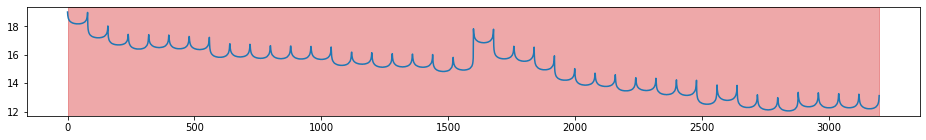

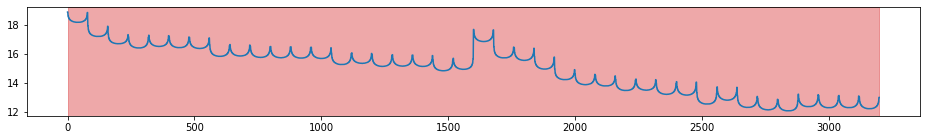

In [ ]:
x_aug1 = df_train['SNR total (signal bw, dB)'].values
plot(x_aug1, x_aug1)

X_aug_cf6, Y_aug_cf6 = tsaug.Pool(size=2).augment(x_aug1, x_aug1)

plot(X_aug_cf6, Y_aug_cf6);

**tsaug.Quantize**
Quantize time series to a level set.

Values in a time series are rounded to the nearest level in the level set.

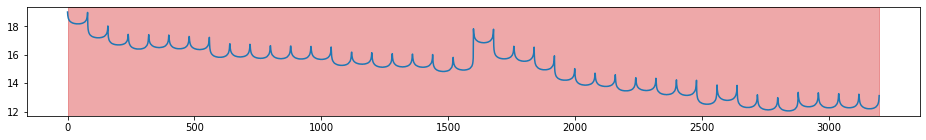

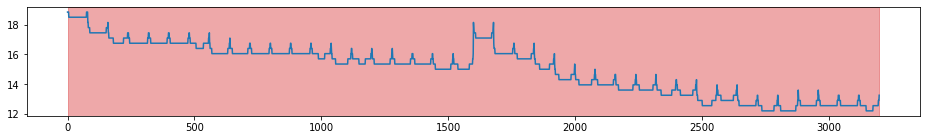

In [ ]:
x_aug1 = df_train['SNR total (signal bw, dB)'].values
plot(x_aug1, x_aug1)

X_aug_cf7, Y_aug_cf7 = tsaug.Quantize(n_levels=20).augment(x_aug1, x_aug1)

plot(X_aug_cf7, Y_aug_cf7);

**tsaug.Resize**
Change the temporal resolution of time series.

The resized time series is obtained by linear interpolation of the original time series.

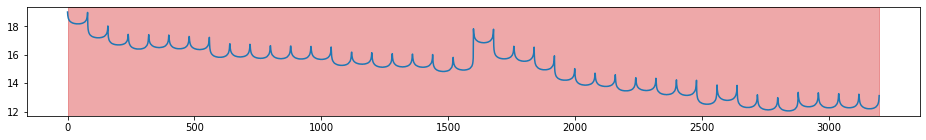

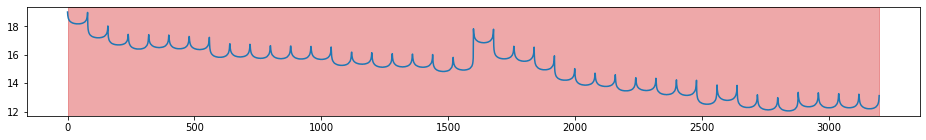

In [ ]:
x_aug1 = df_train['SNR total (signal bw, dB)'].values
plot(x_aug1, x_aug1)

X_aug_cf8, Y_aug_cf8 = tsaug.Resize(size=3200).augment(x_aug1, x_aug1)

plot(X_aug_cf8, Y_aug_cf8);

**tsaug.Reverse**
Reverse the time line of series.

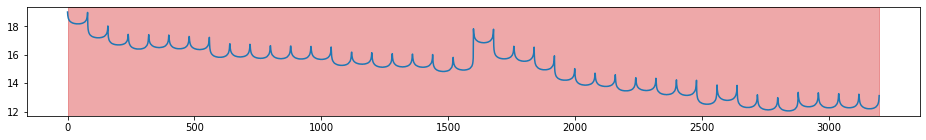

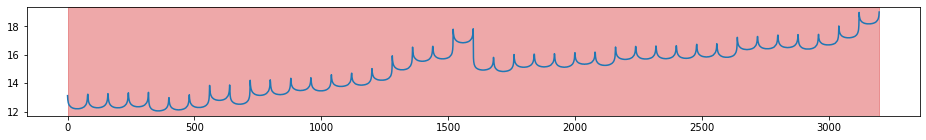

In [ ]:
x_aug1 = df_train['SNR total (signal bw, dB)'].values
plot(x_aug1, x_aug1)

X_aug_cf9, Y_aug_cf9 = tsaug.Reverse().augment(x_aug1, x_aug1)

plot(X_aug_cf9, Y_aug_cf9);

**tsaug.TimeWarp**
Random time warping.

The augmenter random changed the speed of timeline. The time warping is controlled by the number of speed changes and the maximal ratio of max/min speed.

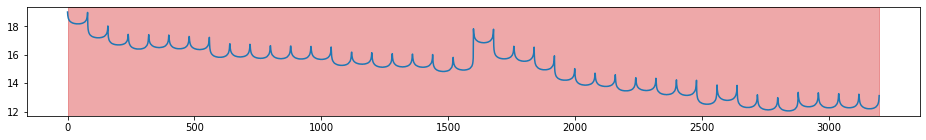

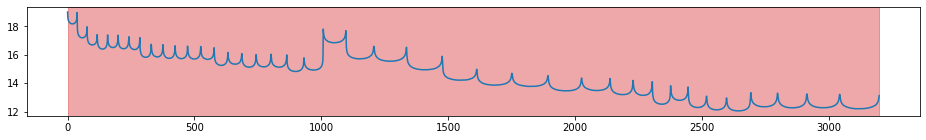

In [ ]:
x_aug1 = df_train['SNR total (signal bw, dB)'].values
plot(x_aug1, x_aug1)

X_aug_cf10, Y_aug_cf10 = tsaug.TimeWarp(n_speed_change=5, max_speed_ratio=3).augment(x_aug1, x_aug1)

plot(X_aug_cf10, Y_aug_cf10);

**Add all Channel frequency data together**

In [ ]:
SNR_total = np.concatenate((x_aug1, X_aug_cf1, X_aug_cf2, X_aug_cf3, X_aug_cf4, X_aug_cf5, X_aug_cf6, X_aug_cf7, X_aug_cf8, X_aug_cf9, X_aug_cf10), axis=0)
SNR_total.shape

(35200,)

**Put all data together in a DataFrame**

In [ ]:
df_train_aug = pd.DataFrame({'Channel_frequency' : Channel_frequency, 'Channel_power' : Channel_power,
                             'OSNR_ASE' : OSNR_ASE, 'SNR_NLI' : SNR_NLI, 'Span' : Span,
                             'Distance' : Distance, 'SNR_total' : SNR_total})

df_train_aug = df_train_aug.replace([np.inf, -np.inf], np.nan)
df_train_aug = df_train_aug.dropna()
df_train_aug

Channel_frequency  Channel_power  OSNR_ASE    SNR_NLI  Span  Distance  \
0             192.150000     -20.050000     21.45  22.680000   4.0     276.0   
1             192.200000     -20.050000     21.45  22.130000   4.0     276.0   
2             192.250000     -20.050000     21.45  21.890000   4.0     276.0   
3             192.300000     -20.050000     21.44  21.730000   4.0     276.0   
4             192.350000     -20.050000     21.44  21.630000   4.0     276.0   
...                  ...            ...       ...        ...   ...       ...   
35195         195.947882     -20.230000     16.18  15.368214  18.0    1239.0   
35196         195.985924     -20.225654     16.18  15.476277  18.0    1239.0   
35197         196.023958     -20.220000     16.18  15.615600  18.0    1239.0   
35198         196.061983     -20.211883     16.18  15.862889  18.0    1239.0   
35199         196.100000     -20.200000     16.18  16.110000  18.0    1239.0   

       SNR_total  
0      19.010000  
1      18.770000  
2      18.650000  
3      18.580000  
4      18.520000  
...          ...  
35195  12.738887  
35196  12.801850  
35197  12.879381  
35198  13.004814  
35199  13.130000  

[33896 rows x 7 columns]

**Begin Modelling with the Augmented Data**

In [ ]:
# For Training Set:
y_ = df_train_aug['SNR_total'].values
x_ = df_train_aug.iloc[:, :-1]

# For Testing Set:
y_test = df_test['SNR total (signal bw, dB)']
X_test = df_test.iloc[:, :-1]

"""
   ii. Data Splitting - 80% train set and 20% val set:
"""
X_train, X_val, y_train, y_val = train_test_split(x_, y_, test_size=0.20, random_state=42)

"""
    Normalize the data:
    It is important to scale features before training a neural network. Normalization is a
    common way of doing this scaling: subtract the mean and divide by the standard deviation
    of each feature.
"""

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_valid = scaler.transform(X_val)
X_test = scaler.transform(X_test)

/usr/local/lib/python3.8/dist-packages/sklearn/base.py:493: FutureWarning: The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names unseen at fit time:
- Channel frequency (THz)
- Channel power (dBm)
- Distance (km)
- OSNR ASE (signal bw, dB)
- SNR NLI (signal bw, dB)
Feature names seen at fit time, yet now missing:
- Channel_frequency
- Channel_power
- Distance
- OSNR_ASE
- SNR_NLI

  warnings.warn(message, FutureWarning)


**Define Random Seed**

In [ ]:
keras.backend.clear_session()
np.random.seed(42)
tf.random.set_seed(42)

**Define the Evaluation Metrics**

In [ ]:
def MAE(pred, true):
    return tf.reduce_mean(tf.abs(pred - true))


def MSE(pred, true):
    return tf.reduce_mean((pred - true) ** 2)


def RMSE(pred, true):
    return tf.sqrt(MSE(pred, true))


def MAPE(pred, true):
    return tf.reduce_mean(tf.abs((pred - true) / true)) * 100


def metric(pred, true):
    mae = MAE(pred, true)
    mse = MSE(pred, true)
    rmse = RMSE(pred, true)
    mape = MAPE(pred, true)

    return mae, mse, rmse, mape

**Print the shape of the dataset**

In [ ]:
print(X_train.shape)
print(X_val.shape)
print(X_test.shape)
print(y_train.shape)
print(y_val.shape)
print(y_test.shape)

(27116, 6)
(6780, 6)
(80, 6)
(27116,)
(6780,)
(80,)


**Model 1 - Random Forest (RF) Regressor:**

Here, we use Random Forest Regressor to fit to our training dataset & predict results.

In [ ]:
# instantiate the Regressor and fit to training data
start = time.time()

rf = RandomForestRegressor()
rf.fit(X_train, y_train)

end = time.time()
print('Time Taken: %.3f seconds' % (end-start))

# viewing params of random forest
rf.get_params()

all_models = list()
performance_all = {}

# making predictions on test set
start = time.time()

y_pred_rf = rf.predict(X_test)

end = time.time()
print('Time Taken: %.3f seconds' % (end-start))

print('Mean Absolute Error:', MAE(y_pred_rf, y_test))
print('Root Mean Square Error:', RMSE(y_pred_rf, y_test))
print('Mean Absolute Percentage Error:', MAPE(y_pred_rf, y_test))

performance_all['RF_Model'] = MAE(y_pred_rf, y_test), RMSE(y_pred_rf, y_test), MAPE(y_pred_rf, y_test)

model1 = rf
all_models.append(model1)

Time Taken: 11.363 seconds
Time Taken: 0.008 seconds
Mean Absolute Error: tf.Tensor(0.37008752272711426, shape=(), dtype=float64)
Root Mean Square Error: tf.Tensor(0.3987992721886891, shape=(), dtype=float64)
Mean Absolute Percentage Error: tf.Tensor(1.90622443342127, shape=(), dtype=float64)


**Data Pre-processing for Model 2**

In [ ]:
# For Training Set:
y_ = df_train_aug['SNR_total'].values
x_ = df_train_aug.iloc[:, :-1]

# For Testing Set:
y_test = df_test['SNR total (signal bw, dB)']
X_test = df_test.iloc[:, :-1]

"""
   ii. Data Splitting - 80% train set and 20% val set:
"""
X_train, X_val, y_train, y_val = train_test_split(x_, y_, test_size=0.20, random_state=42)

"""
    Normalize the data:
    It is important to scale features before training a neural network. Normalization is a
    common way of doing this scaling: subtract the mean and divide by the standard deviation
    of each feature.
"""

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_valid = scaler.transform(X_val)
X_test = scaler.transform(X_test)

/usr/local/lib/python3.8/dist-packages/sklearn/base.py:493: FutureWarning: The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names unseen at fit time:
- Channel frequency (THz)
- Channel power (dBm)
- Distance (km)
- OSNR ASE (signal bw, dB)
- SNR NLI (signal bw, dB)
Feature names seen at fit time, yet now missing:
- Channel_frequency
- Channel_power
- Distance
- OSNR_ASE
- SNR_NLI

  warnings.warn(message, FutureWarning)


**Model 2 - Support Vector Machine (SVM):**

Similar to RF Model, we'll fit SVM on our training dataset and check its performance on test data.

In [ ]:
# instantiate and fit SVM to train data

svc = SVR(C=1.0, epsilon=0.2)
clf = svc
clf.fit(X_train, y_train)

# check parameters of SVM
clf.get_params()

# making predictions on test set
start = time.time()

y_pred_svc = clf.predict(X_test)

end = time.time()
print('Time Taken: %.3f seconds' % (end-start))

print('Mean Absolute Error:', MAE(y_pred_svc, y_test))
print('Root Mean Square Error:', RMSE(y_pred_svc, y_test))
print('Mean Absolute Percentage Error:', MAPE(y_pred_svc, y_test))

performance_all['SVC_Model'] = MAE(y_pred_svc, y_test), RMSE(y_pred_svc, y_test), MAPE(y_pred_svc, y_test)

model2 = clf
all_models.append(model2)

Time Taken: 0.015 seconds
Mean Absolute Error: tf.Tensor(0.47700118898533395, shape=(), dtype=float64)
Root Mean Square Error: tf.Tensor(0.5332105114471193, shape=(), dtype=float64)
Mean Absolute Percentage Error: tf.Tensor(2.4551196770026227, shape=(), dtype=float64)


**Data Pre-processing for Model 3**

In [ ]:
# For Training Set:
y_ = df_train_aug['SNR_total'].values
x_ = df_train_aug.iloc[:, :-1]

# For Testing Set:
y_test = df_test['SNR total (signal bw, dB)']
X_test = df_test.iloc[:, :-1]

"""
   ii. Data Splitting - 80% train set and 20% val set:
"""
X_train, X_val, y_train, y_val = train_test_split(x_, y_, test_size=0.20, random_state=42)

"""
    Normalize the data:
    It is important to scale features before training a neural network. Normalization is a
    common way of doing this scaling: subtract the mean and divide by the standard deviation
    of each feature.
"""

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_valid = scaler.transform(X_val)
X_test = scaler.transform(X_test)

/usr/local/lib/python3.8/dist-packages/sklearn/base.py:493: FutureWarning: The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names unseen at fit time:
- Channel frequency (THz)
- Channel power (dBm)
- Distance (km)
- OSNR ASE (signal bw, dB)
- SNR NLI (signal bw, dB)
Feature names seen at fit time, yet now missing:
- Channel_frequency
- Channel_power
- Distance
- OSNR_ASE
- SNR_NLI

  warnings.warn(message, FutureWarning)


**Model 3:**

Build a Simple Multi-Layer Perceptron (MLP) Regression Model Uisng Subclassing API And Optimize the Hyperparameters:

In [ ]:
%load_ext tensorboard

def build_model(n_hidden=1, n_neurons=30, learning_rate=3e-3, input_shape=[6]):
    model = keras.models.Sequential()
    model.add(keras.layers.InputLayer(input_shape=input_shape))
    for layer in range(n_hidden):
        model.add(keras.layers.Dense(n_neurons, kernel_initializer="he_normal", activation="relu"))
        model.add(keras.layers.BatchNormalization())
        model.add(keras.layers.Activation("relu"))
    model.add(keras.layers.Dense(1))
    optimizer = keras.optimizers.SGD(learning_rate=learning_rate)
    model.compile(loss="mse", optimizer=optimizer, metrics=[MAE, RMSE, MAPE])
    return model

early_stopping_cb = keras.callbacks.EarlyStopping(patience=10)
model_checkpoint_cb = keras.callbacks.ModelCheckpoint("MLP.h5", save_best_only=True)
run_index = 1 # increment every time you train the model
run_logdir = os.path.join(os.curdir, "my_MLP_logs", "run_bn_{:03d}".format(run_index))
tensorboard_cb = keras.callbacks.TensorBoard(run_logdir)
callbacks = [early_stopping_cb, model_checkpoint_cb, tensorboard_cb]

"""
    Hyperparameters Optimization Using Randomized Search Algorithm
"""
keras_reg = keras.wrappers.scikit_learn.KerasRegressor(build_model)

param_distribs = {
    "n_hidden": [1, 2, 3],
    "n_neurons": np.arange(1, 100)               .tolist(),
    "learning_rate": reciprocal(3e-4, 3e-2)      .rvs(1000).tolist(),
}

rnd_search_cv = RandomizedSearchCV(keras_reg, param_distribs, n_iter=10, cv=3, verbose=2)
rnd_search_cv.fit(X_train, y_train, epochs=100,
                  validation_data=(X_val, y_val),
                  callbacks=callbacks)

<ipython-input-99-1080da9d1c9c>:25: DeprecationWarning: KerasRegressor is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  keras_reg = keras.wrappers.scikit_learn.KerasRegressor(build_model)


Fitting 3 folds for each of 10 candidates, totalling 30 fits
Epoch 1/10
565/565 [==============================] - 11s 14ms/step - loss: 10.0335 - MAE: 2.1035 - RMSE: 2.5376 - MAPE: 212.5853 - val_loss: 51375180.0000 - val_MAE: 6629.5747 - val_RMSE: 7151.8662 - val_MAPE: 99.7224
Epoch 2/10
565/565 [==============================] - 5s 9ms/step - loss: 1.7818 - MAE: 1.0356 - RMSE: 1.2924 - MAPE: 7.3003 - val_loss: 41138860.0000 - val_MAE: 5942.5200 - val_RMSE: 6400.3174 - val_MAPE: 99.6889
Epoch 3/10
565/565 [==============================] - 3s 5ms/step - loss: 1.0787 - MAE: 0.8061 - RMSE: 1.0060 - MAPE: 5.6011 - val_loss: 25770296.0000 - val_MAE: 4723.3462 - val_RMSE: 5066.2554 - val_MAPE: 99.6141
Epoch 4/10
565/565 [==============================] - 2s 3ms/step - loss: 0.7667 - MAE: 0.6729 - RMSE: 0.8490 - MAPE: 4.6459 - val_loss: 17673670.0000 - val_MAE: 3944.6074 - val_RMSE: 4196.5117 - val_MAPE: 99.5503
Epoch 5/10
565/565 [==============================] - 3s 6ms/step - loss: 0.62

RandomizedSearchCV(cv=3,
                   estimator=<keras.wrappers.scikit_learn.KerasRegressor object at 0x7f5dcc253be0>,
                   param_distributions={'learning_rate': [0.014510781542046656,
                                                          0.0023802880783771775,
                                                          0.001851065245020945,
                                                          0.021401242412665288,
                                                          0.008544078826267551,
                                                          0.0013495929233082308,
                                                          0.004149628363971143,
                                                          0.003302096605676857,
                                                          0.02508795739171871,
                                                          0.014661856076506722,...
                                                          0.00210826022

**Obtain the best Parameters, Score, trained model, and use it for evaluation**

In [ ]:
print(rnd_search_cv.best_params_)
print(rnd_search_cv.best_score_)
rnd_search_cv.score(X_test, y_test)

model = rnd_search_cv.best_estimator_.model
model.evaluate(X_test, y_test)

{'n_neurons': 37, 'n_hidden': 1, 'learning_rate': 0.004852393510902907}
-0.11146048456430435
3/3 [==============================] - 0s 5ms/step - loss: 0.5794 - MAE: 0.7645 - RMSE: 0.7690 - MAPE: 3.7900


[0.5794316530227661, 0.7644662857055664, 0.7690427303314209, 3.790034294128418]

**Make Predictions with the best trained Model:**

In [ ]:
y_pred_MLP = model.predict(X_test)
y_pred_MLP = y_pred_MLP[:, -1]
performance_all['MLP_Model'] = MAE(y_pred_MLP, y_test), RMSE(y_pred_MLP, y_test), MAPE(y_pred_MLP, y_test)

3/3 [==============================] - 0s 3ms/step


**View the Model's Structure**

In [ ]:
model.summary()

Model: "sequential_30"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_93 (Dense)            (None, 37)                259       
                                                                 
 batch_normalization_63 (Bat  (None, 37)               148       
 chNormalization)                                                
                                                                 
 activation_63 (Activation)  (None, 37)                0         
                                                                 
 dense_94 (Dense)            (None, 1)                 38        
                                                                 
Total params: 445
Trainable params: 371
Non-trainable params: 74
_________________________________________________________________


**Data Pre-processing for Model 4**

In [ ]:
# For Training Set:
y_ = df_train_aug['SNR_total'].values
x_ = df_train_aug.iloc[:, :-1]

# For Testing Set:
y_test = df_test['SNR total (signal bw, dB)']
X_test = df_test.iloc[:, :-1]

"""
   ii. Data Splitting - 80% train set and 20% val set:
"""
X_train, X_val, y_train, y_val = train_test_split(x_, y_, test_size=0.20, random_state=42)

"""
    Normalize the data:
    It is important to scale features before training a neural network. Normalization is a
    common way of doing this scaling: subtract the mean and divide by the standard deviation
    of each feature.
"""

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_valid = scaler.transform(X_val)
X_test = scaler.transform(X_test)

/usr/local/lib/python3.8/dist-packages/sklearn/base.py:493: FutureWarning: The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names unseen at fit time:
- Channel frequency (THz)
- Channel power (dBm)
- Distance (km)
- OSNR ASE (signal bw, dB)
- SNR NLI (signal bw, dB)
Feature names seen at fit time, yet now missing:
- Channel_frequency
- Channel_power
- Distance
- OSNR_ASE
- SNR_NLI

  warnings.warn(message, FutureWarning)


**Model 4 - Convolutional Neural Network (CNN)**

**Compile, Build, and Perform Hyperparameters Optimization in order to Build the Deep Learning CNN Model:**

We will apply the CNN algorithm to our data to generate prediction results. First, we need to reshape our data for CNN.

We will use 1-dimensional CNN for our model, reshaping our data as per the dimensions of our CNN

Note that the timeseries data used here are univariate, meaning we only have one channel per timeseries example.
We will therefore transform the timeseries into a multivariate one with one channel using a simple
reshaping via numpy. This will allow us to construct a model that is easily applicable to multivariate time series



In [ ]:
X_val = X_val.values
# Reshape the Data:
X_train = X_train.reshape(len(X_train), X_train.shape[1], 1)
X_val = X_val.reshape(len(X_val), X_val.shape[1], 1)
X_test = X_test.reshape(len(X_test), X_test.shape[1], 1)
print(X_train.shape, X_val, X_test.shape)

%load_ext tensorboard

def build_model(n_hidden=1, n_neurons=30, learning_rate=3e-3, input_shape=(6, 1)):
    model = keras.models.Sequential()
    model.add(keras.layers.InputLayer(input_shape=input_shape))
    for layer in range(n_hidden):
        model.add(Conv1D(n_neurons, kernel_size=2, activation='relu',
                    padding='same', input_shape=(6, 1)))
        model.add(keras.layers.BatchNormalization())
        model.add(MaxPooling1D(pool_size=(3), strides=2, padding='same'))
        model.add(keras.layers.Activation("relu"))
        model.add(Dropout(0.2))
    model.add(keras.layers.Dense(1))
    optimizer = keras.optimizers.SGD(learning_rate=learning_rate)
    model.compile(loss="mse", optimizer=optimizer, metrics=[MAE, RMSE, MAPE])
    return model

early_stopping_cb = keras.callbacks.EarlyStopping(patience=10)
model_checkpoint_cb = keras.callbacks.ModelCheckpoint("CNN.h5", save_best_only=True)
run_index = 1 # increment every time you train the model
run_logdir = os.path.join(os.curdir, "my_CNN_logs", "run_bn_{:03d}".format(run_index))
tensorboard_cb = keras.callbacks.TensorBoard(run_logdir)
callbacks = [early_stopping_cb, model_checkpoint_cb, tensorboard_cb]

"""
    Hyperparameters Optimization Using Randomized Search Algorithm
"""
keras_reg = keras.wrappers.scikit_learn.KerasRegressor(build_model)

param_distribs = {
    "n_hidden": [1, 2, 3],
    "n_neurons": np.arange(1, 100)               .tolist(),
    "learning_rate": reciprocal(3e-4, 3e-2)      .rvs(1000).tolist(),
}

rnd_search_cv = RandomizedSearchCV(keras_reg, param_distribs, n_iter=10, cv=3, verbose=2)
rnd_search_cv.fit(X_train, y_train, epochs=100,
                  validation_data=(X_val, y_val),
                  callbacks=callbacks)

(27116, 6, 1) [[[ 194.16612431]
  [ -20.19788793]
  [  18.04561385]
  [  14.72483599]
  [  13.        ]
  [1047.        ]]

 [[ 193.775     ]
  [ -20.12      ]
  [  18.89      ]
  [  17.56      ]
  [   8.        ]
  [ 560.        ]]

 [[ 194.        ]
  [ -20.08      ]
  [  20.97013542]
  [  18.98992568]
  [   4.        ]
  [ 397.        ]]

 ...

 [[ 195.75      ]
  [ -20.11      ]
  [  18.97      ]
  [  18.09      ]
  [   8.        ]
  [ 510.        ]]

 [[ 195.6       ]
  [ -20.24      ]
  [  15.46      ]
  [  15.        ]
  [  17.        ]
  [1221.        ]]

 [[ 192.91597673]
  [ -20.24      ]
  [  16.42      ]
  [  14.41      ]
  [  18.        ]
  [1239.        ]]] (80, 6, 1)
The tensorboard extension is already loaded. To reload it, use:
  %reload_ext tensorboard
Fitting 3 folds for each of 10 candidates, totalling 30 fits


<ipython-input-104-a3999ba77136>:35: DeprecationWarning: KerasRegressor is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  keras_reg = keras.wrappers.scikit_learn.KerasRegressor(build_model)


Epoch 1/10
565/565 [==============================] - 4s 4ms/step - loss: 8.2068 - MAE: 2.1891 - RMSE: 2.7133 - MAPE: inf - val_loss: 966002.6875 - val_MAE: 875.8082 - val_RMSE: 979.8624 - val_MAPE: 97.7212
Epoch 2/10
565/565 [==============================] - 2s 3ms/step - loss: 4.8139 - MAE: 1.7651 - RMSE: 2.1797 - MAPE: 12.2391 - val_loss: 402573.5625 - val_MAE: 564.0665 - val_RMSE: 632.5479 - val_MAPE: 96.5215
Epoch 3/10
565/565 [==============================] - 2s 3ms/step - loss: 4.3105 - MAE: 1.6837 - RMSE: 2.0616 - MAPE: 11.5710 - val_loss: 143358.1875 - val_MAE: 335.1140 - val_RMSE: 377.4568 - val_MAPE: 94.3730
Epoch 4/10
565/565 [==============================] - 2s 3ms/step - loss: 4.0644 - MAE: 1.6457 - RMSE: 1.9985 - MAPE: 11.2601 - val_loss: 80292.7422 - val_MAE: 250.6514 - val_RMSE: 282.4703 - val_MAPE: 92.6685
Epoch 5/10
565/565 [==============================] - 2s 3ms/step - loss: 3.9088 - MAE: 1.6214 - RMSE: 1.9604 - MAPE: 11.0613 - val_loss: 41028.6289 - val_MAE: 1

RandomizedSearchCV(cv=3,
                   estimator=<keras.wrappers.scikit_learn.KerasRegressor object at 0x7f5dcbcbaa00>,
                   param_distributions={'learning_rate': [0.016767776751771987,
                                                          0.027879706220566198,
                                                          0.010319724003926604,
                                                          0.002054257205865781,
                                                          0.002088503749409412,
                                                          0.008959542994999879,
                                                          0.0009008978412536868,
                                                          0.0004989643083159175,
                                                          0.0015359092997378394,
                                                          0.00112615777105582...
                                                          0.02382558772

**Obtain the best Parameters, Score, Best Trained Model and Use it for Evaluation**

In [ ]:
print(rnd_search_cv.best_params_)
print(rnd_search_cv.best_score_)
rnd_search_cv.score(X_test, y_test)

model = rnd_search_cv.best_estimator_.model
model.evaluate(X_test, y_test)

{'n_neurons': 2, 'n_hidden': 1, 'learning_rate': 0.014487331183657765}
-3.534801165262858
3/3 [==============================] - 0s 4ms/step - loss: 20.3813 - MAE: 4.5312 - RMSE: 4.5331 - MAPE: 30.5235


[20.381284713745117, 4.53124475479126, 4.533070087432861, 30.52349281311035]

**Make Predictions with the trained Model**

In [ ]:
y_pred_CNN = model.predict(X_test)
y_pred_CNN = y_pred_CNN[:, -1, -1]
performance_all['CNN_Model'] = MAE(y_pred_CNN, y_test), RMSE(y_pred_CNN, y_test), MAPE(y_pred_CNN, y_test)

3/3 [==============================] - 0s 6ms/step


**View the Model's Structure**

In [ ]:
model.summary()

Model: "sequential_61"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d_48 (Conv1D)          (None, 6, 2)              6         
                                                                 
 batch_normalization_112 (Ba  (None, 6, 2)             8         
 tchNormalization)                                               
                                                                 
 max_pooling1d_48 (MaxPoolin  (None, 3, 2)             0         
 g1D)                                                            
                                                                 
 activation_112 (Activation)  (None, 3, 2)             0         
                                                                 
 dropout_48 (Dropout)        (None, 3, 2)              0         
                                                                 
 dense_125 (Dense)           (None, 3, 1)            

**Data Pre-processing for Model 5**

In [ ]:
# For Training Set:
y_ = df_train_aug['SNR_total'].values
x_ = df_train_aug.iloc[:, :-1]

# For Testing Set:
y_test = df_test['SNR total (signal bw, dB)']
X_test = df_test.iloc[:, :-1]

"""
   ii. Data Splitting - 80% train set and 20% val set:
"""
X_train, X_val, y_train, y_val = train_test_split(x_, y_, test_size=0.20, random_state=42)

"""
    Normalize the data:
    It is important to scale features before training a neural network. Normalization is a
    common way of doing this scaling: subtract the mean and divide by the standard deviation
    of each feature.
"""

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_valid = scaler.transform(X_val)
X_test = scaler.transform(X_test)

/usr/local/lib/python3.8/dist-packages/sklearn/base.py:493: FutureWarning: The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names unseen at fit time:
- Channel frequency (THz)
- Channel power (dBm)
- Distance (km)
- OSNR ASE (signal bw, dB)
- SNR NLI (signal bw, dB)
Feature names seen at fit time, yet now missing:
- Channel_frequency
- Channel_power
- Distance
- OSNR_ASE
- SNR_NLI

  warnings.warn(message, FutureWarning)


**Model 5 - Build the Long Short Term Memory Neural Network (LSTM) and Perform Hyperparameters Optimization Using Randomized Search Algorithm**

In [ ]:
%load_ext tensorboard

def build_model(n_hidden=1, n_neurons=30, learning_rate=3e-3, input_shape=(6, 1)):
    model = keras.models.Sequential()
    model.add(keras.layers.InputLayer(input_shape=input_shape))
    for layer in range(n_hidden):
        model.add(keras.layers.LSTM(n_neurons, return_sequences=True, activation="relu"))
        model.add(keras.layers.BatchNormalization())
        model.add(keras.layers.Activation("relu"))
        model.add(Dropout(0.2))
    model.add(keras.layers.Dense(1))
    optimizer = keras.optimizers.SGD(learning_rate=learning_rate)
    model.compile(loss="mse", optimizer=optimizer, metrics=[MAE, RMSE, MAPE])
    return model

early_stopping_cb = keras.callbacks.EarlyStopping(patience=10)
model_checkpoint_cb = keras.callbacks.ModelCheckpoint("LSTM.h5", save_best_only=True)
run_index = 1 # increment every time you train the model
run_logdir = os.path.join(os.curdir, "my_LSTM_logs", "run_bn_{:03d}".format(run_index))
tensorboard_cb = keras.callbacks.TensorBoard(run_logdir)
callbacks = [early_stopping_cb, model_checkpoint_cb, tensorboard_cb]

"""
    Hyperparameters Optimization Using Randomized Search Algorithm
"""
keras_reg = keras.wrappers.scikit_learn.KerasRegressor(build_model)

param_distribs = {
    "n_hidden": [1, 2, 3],
    "n_neurons": np.arange(1, 100)               .tolist(),
    "learning_rate": reciprocal(3e-4, 3e-2)      .rvs(1000).tolist(),
}

rnd_search_cv = RandomizedSearchCV(keras_reg, param_distribs, n_iter=10, cv=3, verbose=2)
rnd_search_cv.fit(X_train, y_train, epochs=100,
                  validation_data=(X_val, y_val),
                  callbacks=callbacks)

The tensorboard extension is already loaded. To reload it, use:
  %reload_ext tensorboard
Fitting 3 folds for each of 10 candidates, totalling 30 fits


<ipython-input-115-3cafbd187ad9>:26: DeprecationWarning: KerasRegressor is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  keras_reg = keras.wrappers.scikit_learn.KerasRegressor(build_model)


Epoch 1/10
565/565 [==============================] - 14s 13ms/step - loss: 7.9573 - MAE: 2.0853 - RMSE: 2.5751 - MAPE: inf - val_loss: 15841.5713 - val_MAE: 87.9814 - val_RMSE: 125.6991 - val_MAPE: 167.2701
Epoch 2/10
565/565 [==============================] - 6s 11ms/step - loss: 4.6876 - MAE: 1.7445 - RMSE: 2.1513 - MAPE: 12.0506 - val_loss: 306775.2812 - val_MAE: 330.8888 - val_RMSE: 553.3250 - val_MAPE: 493.8017
Epoch 3/10
565/565 [==============================] - 7s 12ms/step - loss: 4.3343 - MAE: 1.6872 - RMSE: 2.0674 - MAPE: 11.5872 - val_loss: 39521.2891 - val_MAE: 141.0414 - val_RMSE: 198.7872 - val_MAPE: 174.1832
Epoch 4/10
565/565 [==============================] - 6s 11ms/step - loss: 4.1221 - MAE: 1.6535 - RMSE: 2.0134 - MAPE: 11.3139 - val_loss: 10016923.0000 - val_MAE: 1506.5243 - val_RMSE: 3154.3679 - val_MAPE: 94.0632
Epoch 5/10
565/565 [==============================] - 7s 12ms/step - loss: 3.9893 - MAE: 1.6327 - RMSE: 1.9811 - MAPE: 11.1434 - val_loss: 11528905.000

RandomizedSearchCV(cv=3,
                   estimator=<keras.wrappers.scikit_learn.KerasRegressor object at 0x7f5dbeeab7c0>,
                   param_distributions={'learning_rate': [0.0009871040288905357,
                                                          0.0006405218680608259,
                                                          0.0013726233562120866,
                                                          0.00978642937022827,
                                                          0.0032801444822271346,
                                                          0.0007706972387859703,
                                                          0.017091548472271314,
                                                          0.01722998758911675,
                                                          0.016530199872504456,
                                                          0.00090097694391136...
                                                          0.00048760556

**Obtain the best Parameters, Score, and Best Trained Model and Use it for Evaluation**

In [ ]:
print(rnd_search_cv.best_params_)
print(rnd_search_cv.best_score_)
rnd_search_cv.score(X_test, y_test)

model = rnd_search_cv.best_estimator_.model
model.evaluate(X_test, y_test)

{'n_neurons': 12, 'n_hidden': 1, 'learning_rate': 0.02085020344364959}
-3.5380401611328125
3/3 [==============================] - 0s 5ms/step - loss: 20.3089 - MAE: 4.5276 - RMSE: 4.5301 - MAPE: 30.4946


[20.308923721313477, 4.527644157409668, 4.5301194190979, 30.49460792541504]

**Make Predictions with the Best trained Model:**

In [ ]:
y_pred_LSTM = model.predict(X_test)
y_pred_LSTM = y_pred_LSTM[:, -1, -1]
performance_all['LSTM_Model'] = MAE(y_pred_LSTM, y_test), RMSE(y_pred_LSTM, y_test), MAPE(y_pred_LSTM, y_test)

3/3 [==============================] - 0s 5ms/step


**View the Model's Structure**

In [ ]:
model.summary()

Model: "sequential_92"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_60 (LSTM)              (None, 6, 12)             672       
                                                                 
 batch_normalization_173 (Ba  (None, 6, 12)            48        
 tchNormalization)                                               
                                                                 
 activation_173 (Activation)  (None, 6, 12)            0         
                                                                 
 dropout_109 (Dropout)       (None, 6, 12)             0         
                                                                 
 dense_156 (Dense)           (None, 6, 1)              13        
                                                                 
Total params: 733
Trainable params: 709
Non-trainable params: 24
______________________________________________________

**Data Pre-processing for Model 6**

In [ ]:
# For Training Set:
y_ = df_train_aug['SNR_total'].values
x_ = df_train_aug.iloc[:, :-1]

# For Testing Set:
y_test = df_test['SNR total (signal bw, dB)']
X_test = df_test.iloc[:, :-1]

"""
   ii. Data Splitting - 80% train set and 20% val set:
"""
X_train, X_val, y_train, y_val = train_test_split(x_, y_, test_size=0.20, random_state=42)

"""
    Normalize the data:
    It is important to scale features before training a neural network. Normalization is a
    common way of doing this scaling: subtract the mean and divide by the standard deviation
    of each feature.
"""

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_valid = scaler.transform(X_val)
X_test = scaler.transform(X_test)

/usr/local/lib/python3.8/dist-packages/sklearn/base.py:493: FutureWarning: The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names unseen at fit time:
- Channel frequency (THz)
- Channel power (dBm)
- Distance (km)
- OSNR ASE (signal bw, dB)
- SNR NLI (signal bw, dB)
Feature names seen at fit time, yet now missing:
- Channel_frequency
- Channel_power
- Distance
- OSNR_ASE
- SNR_NLI

  warnings.warn(message, FutureWarning)


**Model 6 - Gated Recurrent Unit Neural Network (GRU) and Perform Hyperparameters Optimization Using Randomized Search Algorithm**

In [ ]:
%load_ext tensorboard

def build_model(n_hidden=1, n_neurons=30, learning_rate=3e-3, input_shape=(6, 1)):
    model = keras.models.Sequential()
    model.add(keras.layers.InputLayer(input_shape=input_shape))
    for layer in range(n_hidden):
        model.add(keras.layers.GRU(n_neurons, return_sequences=True, activation="relu"))
        model.add(keras.layers.BatchNormalization())
        model.add(keras.layers.Activation("relu"))
        model.add(Dropout(0.2))
    model.add(keras.layers.Dense(1))
    optimizer = keras.optimizers.SGD(learning_rate=learning_rate)
    model.compile(loss="mse", optimizer=optimizer, metrics=[MAE, RMSE, MAPE])
    return model

early_stopping_cb = keras.callbacks.EarlyStopping(patience=10)
model_checkpoint_cb = keras.callbacks.ModelCheckpoint("GRU.h5", save_best_only=True)
run_index = 1 # increment every time you train the model
run_logdir = os.path.join(os.curdir, "my_GRU_logs", "run_bn_{:03d}".format(run_index))
tensorboard_cb = keras.callbacks.TensorBoard(run_logdir)
callbacks = [early_stopping_cb, model_checkpoint_cb, tensorboard_cb]

"""
    Hyperparameters Optimization Using Randomized Search Algorithm
"""
keras_reg = keras.wrappers.scikit_learn.KerasRegressor(build_model)

param_distribs = {
    "n_hidden": [1, 2, 3],
    "n_neurons": np.arange(1, 100)               .tolist(),
    "learning_rate": reciprocal(3e-4, 3e-2)      .rvs(1000).tolist(),
}

rnd_search_cv = RandomizedSearchCV(keras_reg, param_distribs, n_iter=10, cv=3, verbose=2)
rnd_search_cv.fit(X_train, y_train, epochs=100,
                  validation_data=(X_val, y_val),
                  callbacks=callbacks)

The tensorboard extension is already loaded. To reload it, use:
  %reload_ext tensorboard
Fitting 3 folds for each of 10 candidates, totalling 30 fits


<ipython-input-123-e4a7011091fa>:26: DeprecationWarning: KerasRegressor is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  keras_reg = keras.wrappers.scikit_learn.KerasRegressor(build_model)


Epoch 1/10
565/565 [==============================] - 7s 9ms/step - loss: 19.8128 - MAE: 3.2142 - RMSE: 3.8873 - MAPE: inf - val_loss: 3218.6038 - val_MAE: 51.1364 - val_RMSE: 56.6943 - val_MAPE: 73.8461
Epoch 2/10
565/565 [==============================] - 6s 10ms/step - loss: 8.1696 - MAE: 2.2568 - RMSE: 2.8505 - MAPE: 17.0404 - val_loss: 19210.2305 - val_MAE: 100.7330 - val_RMSE: 138.3636 - val_MAPE: 82.1940
Epoch 3/10
565/565 [==============================] - 5s 9ms/step - loss: 7.2231 - MAE: 2.1318 - RMSE: 2.6798 - MAPE: 15.6315 - val_loss: 9620.9580 - val_MAE: 70.5074 - val_RMSE: 97.8689 - val_MAPE: 77.4843
Epoch 4/10
565/565 [==============================] - 5s 9ms/step - loss: 6.6378 - MAE: 2.0466 - RMSE: 2.5673 - MAPE: 14.8078 - val_loss: 51140.0195 - val_MAE: 156.7449 - val_RMSE: 225.5791 - val_MAPE: 87.3602
Epoch 5/10
565/565 [==============================] - 3s 6ms/step - loss: 6.2086 - MAE: 1.9823 - RMSE: 2.4826 - MAPE: 14.1919 - val_loss: 69870.8438 - val_MAE: 174.7029

RandomizedSearchCV(cv=3,
                   estimator=<keras.wrappers.scikit_learn.KerasRegressor object at 0x7f5dcbb24e20>,
                   param_distributions={'learning_rate': [0.004703897179637872,
                                                          0.01619244840627821,
                                                          0.023474087147468563,
                                                          0.0004885768256632411,
                                                          0.0006120381305116851,
                                                          0.023259146400489244,
                                                          0.008916444514763247,
                                                          0.017502855380012602,
                                                          0.0007627575638385248,
                                                          0.004490482383291388...
                                                          0.01434578996

**Obtain the best Parameters, Score, Best Trained Model and Use it for Evaluation**

In [ ]:
print(rnd_search_cv.best_params_)
print(rnd_search_cv.best_score_)
rnd_search_cv.score(X_test, y_test)

model = rnd_search_cv.best_estimator_.model
model.evaluate(X_test, y_test)

{'n_neurons': 13, 'n_hidden': 2, 'learning_rate': 0.005948386348579476}
-3.5401388009389243
3/3 [==============================] - 0s 5ms/step - loss: 20.4717 - MAE: 4.5416 - RMSE: 4.5435 - MAPE: 30.6151


[20.471683502197266, 4.541591644287109, 4.543514728546143, 30.615142822265625]

**Make Predictions with the Best trained Model**

In [ ]:
y_pred_GRU = model.predict(X_test)
y_pred_GRU = y_pred_GRU[:, -1, -1]
performance_all['GRU_Model'] = MAE(y_pred_GRU, y_test), RMSE(y_pred_GRU, y_test), MAPE(y_pred_GRU, y_test)

3/3 [==============================] - 0s 5ms/step


**View the Model's Structure**

In [ ]:
model.summary()

Model: "sequential_123"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 gru_60 (GRU)                (None, 6, 13)             624       
                                                                 
 batch_normalization_234 (Ba  (None, 6, 13)            52        
 tchNormalization)                                               
                                                                 
 activation_234 (Activation)  (None, 6, 13)            0         
                                                                 
 dropout_170 (Dropout)       (None, 6, 13)             0         
                                                                 
 gru_61 (GRU)                (None, 6, 13)             1092      
                                                                 
 batch_normalization_235 (Ba  (None, 6, 13)            52        
 tchNormalization)                                  

In [ ]:
performance_all

{'RF_Model': (<tf.Tensor: shape=(), dtype=float64, numpy=0.37008752272711426>,
  <tf.Tensor: shape=(), dtype=float64, numpy=0.3987992721886891>,
  <tf.Tensor: shape=(), dtype=float64, numpy=1.90622443342127>),
 'SVC_Model': (<tf.Tensor: shape=(), dtype=float64, numpy=0.47700118898533395>,
  <tf.Tensor: shape=(), dtype=float64, numpy=0.5332105114471193>,
  <tf.Tensor: shape=(), dtype=float64, numpy=2.4551196770026227>),
 'MLP_Model': (<tf.Tensor: shape=(), dtype=float64, numpy=0.7544449558258054>,
  <tf.Tensor: shape=(), dtype=float64, numpy=0.7612040425869205>,
  <tf.Tensor: shape=(), dtype=float64, numpy=3.8939406426319287>),
 'CNN_Model': (<tf.Tensor: shape=(), dtype=float64, numpy=4.512141014099122>,
  <tf.Tensor: shape=(), dtype=float64, numpy=4.514564095083316>,
  <tf.Tensor: shape=(), dtype=float64, numpy=23.30541872045971>),
 'LSTM_Model': (<tf.Tensor: shape=(), dtype=float64, numpy=4.50786845779419>,
  <tf.Tensor: shape=(), dtype=float64, numpy=4.511422375647492>,
  <tf.Tensor:

**Performance Comparison between All ML and DL Models in terms of all Metrics After Augmentation**

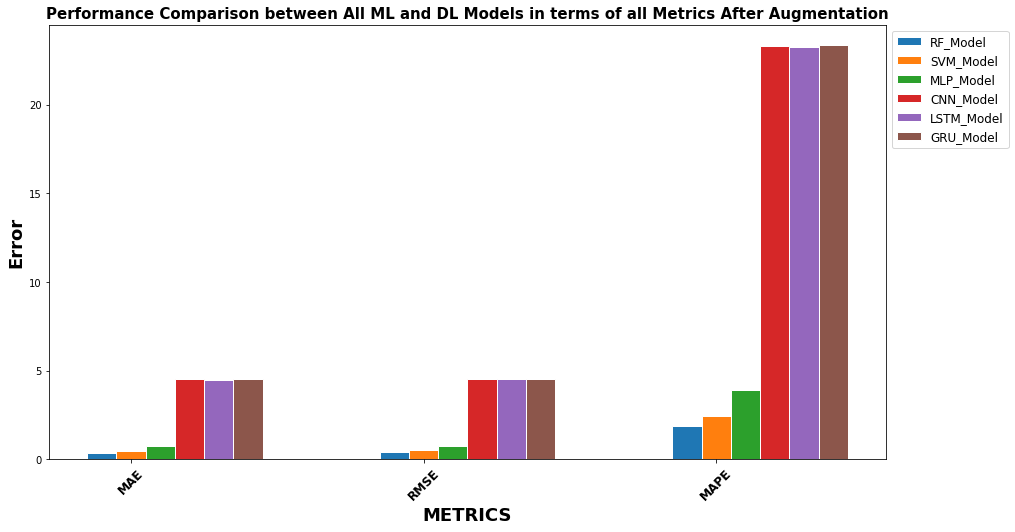

In [ ]:
RF_Model = [0.3700, 0.3987, 1.9062]
SVM_Model = [0.4770, 0.5332, 2.4551]
MLP_Model = [0.7544, 0.7612, 3.8939]
CNN_Model = [4.5121, 4.5145, 23.3054]
LSTM_Model = [4.5078, 4.5114, 23.28218]
GRU_Model = [4.5208, 4.5232, 23.3503]


N = 6
x = np.arange(N)
c = ['red', 'blue', 'green']
width = 0.3

# Set position of bar on X axis
r1 = np.arange(0, len(RF_Model) * 3, 3)
r2 = [x + width for x in r1]
r3 = [x + width for x in r2]
r4 = [x + width for x in r3]
r5 = [x + width for x in r4]
r6 = [x + width for x in r5]

plt.figure(figsize=(15, 8))
plt.ylabel("Error", weight='bold').set_fontsize('18')
plt.bar(r1, RF_Model, width, edgecolor='white', label='RF_Model')
plt.bar(r2, SVM_Model, width, edgecolor='white', label='SVM_Model')
plt.bar(r3, MLP_Model, width, edgecolor='white', label='MLP_Model')
plt.bar(r4, CNN_Model, width, edgecolor='white', label='CNN_Model')
plt.bar(r5, LSTM_Model, width, edgecolor='white', label='LSTM_Model')
plt.bar(r6, GRU_Model, width, edgecolor='white', label='GRU_Model')
plt.xlabel('METRICS', weight='bold').set_fontsize('18')
plt.xticks([r + width for r in range(0, len(RF_Model) * 3, 3)], ['MAE', 'RMSE', 'MAPE'], rotation=45, size = 12, fontweight='bold')
plt.title('Performance Comparison between All ML and DL Models in terms of all Metrics After Augmentation', size = 15, fontweight='bold')
plt.legend(loc = 'best', bbox_to_anchor = (1.0, 1.0), ncol = 1, frameon=True, fontsize = '12')
plt.savefig('Performance Comparison between All ML and DL Models in terms of all Metrics.png')

**Performance Comparison between All ML and DL Models in terms of all Metrics Before and After Augmentation**

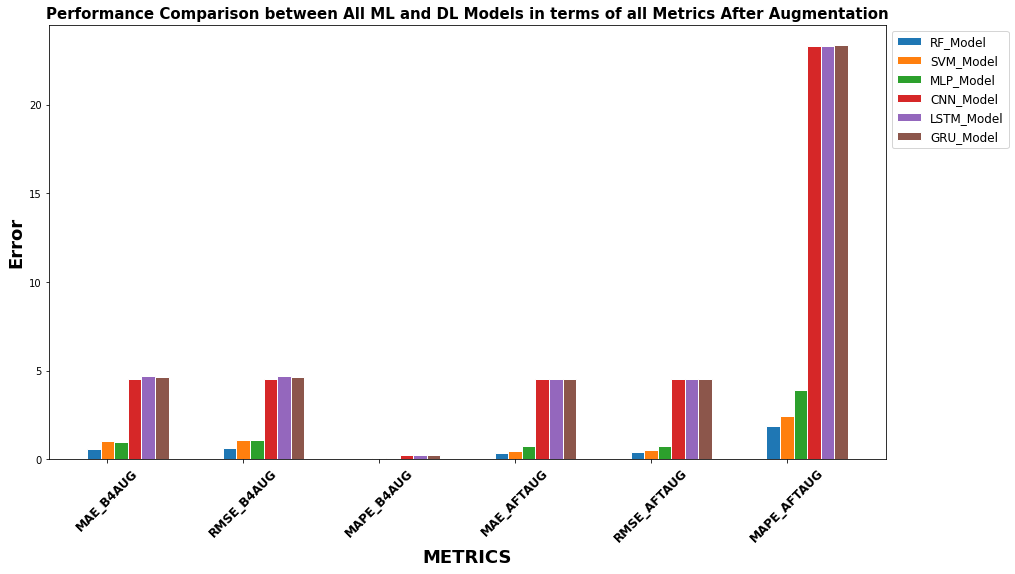

In [ ]:
RF_Model = [0.6002912500000004, 0.6170961631909572, 0.03095742520933848, 0.3700, 0.3987, 1.9062]
SVM_Model = [1.0629888299326313, 1.108937997325214, 0.054795037325405915, 0.4770, 0.5332, 2.4551]
MLP_Model = [0.9649075888395305, 1.077064989149656, 0.04990548687806204, 0.7544, 0.7612, 3.8939]
CNN_Model = [4.509283710479734, 4.5117083260225606, 0.23290656976043722, 4.5121, 4.5145, 23.3054]
LSTM_Model = [4.709705494801201, 4.7121318470347235, 0.2432610001943479, 4.5078, 4.5114, 23.28218]
GRU_Model = [4.647322945753731, 4.649675580133427, 0.24003811817786005, 4.5208, 4.5232, 23.3503]

N = 6
x = np.arange(N)
c = ['red', 'blue', 'green']
width = 0.3

# Set position of bar on X axis
r1 = np.arange(0, len(RF_Model) * 3, 3)
r2 = [x + width for x in r1]
r3 = [x + width for x in r2]
r4 = [x + width for x in r3]
r5 = [x + width for x in r4]
r6 = [x + width for x in r5]

plt.figure(figsize=(15, 8))
plt.ylabel("Error", weight='bold').set_fontsize('18')
plt.bar(r1, RF_Model, width, edgecolor='white', label='RF_Model')
plt.bar(r2, SVM_Model, width, edgecolor='white', label='SVM_Model')
plt.bar(r3, MLP_Model, width, edgecolor='white', label='MLP_Model')
plt.bar(r4, CNN_Model, width, edgecolor='white', label='CNN_Model')
plt.bar(r5, LSTM_Model, width, edgecolor='white', label='LSTM_Model')
plt.bar(r6, GRU_Model, width, edgecolor='white', label='GRU_Model')
plt.xlabel('METRICS', weight='bold').set_fontsize('18')
plt.xticks([r + width for r in range(0, len(RF_Model) * 3, 3)], ['MAE_B4AUG', 'RMSE_B4AUG', 'MAPE_B4AUG', 'MAE_AFTAUG', 'RMSE_AFTAUG', 'MAPE_AFTAUG'], rotation=45, size = 12, fontweight='bold')
plt.title('Performance Comparison between All ML and DL Models in terms of all Metrics After Augmentation', size = 15, fontweight='bold')
plt.legend(loc = 'best', bbox_to_anchor = (1.0, 1.0), ncol = 1, frameon=True, fontsize = '12')
plt.savefig('Performance Comparison between All ML and DL Models in terms of all Metrics.png')